In [1]:
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import matplotlib.gridspec as gridspec
import spectral_analysis as sa
from scipy.special import erf
import datafidelity as df
import composite

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# all_uv = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))"
# SN_Array = composite.grab(all_uv, multi_epoch = True, make_corr = False)
# for SN in SN_Array:
#     if SN.minwave < 2800.:
#         print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave

In [4]:
# print 'Need Phases:'
# for SN in SN_Array:
#     if SN.phase == None:
#         print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave
# print
# print 'Need dm15s:'
# for SN in SN_Array:
#     if SN.dm15_source == None and SN.dm15_from_fits == None:
#         print SN.name, SN.filename, SN.mjd, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave

In [5]:
# test_uv_query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase between -3 and 3 and source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))"]
# comp_test_uv, sn_arrays_test_uv, boot_sn_arrays_test_uv = query_db.main(len(test_uv_query), test_uv_query, boot='nb', medmean=2, verbose=True, multi_epoch=False, selection='max_coverage')

In [6]:
# dm15s = []
# for SN in sn_arrays_test_uv[0]:
#     if SN.dm15_source != None:
#         dm15s.append(SN.dm15_source)
#     else:
#         dm15s.append(SN.dm15_from_fits)
# plt.hist(dm15s, bins = 20)
# plt.show()

In [7]:
# query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7))"]

query_dm15_max_fewer_bins = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7))",
                             "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7))"]


In [8]:
comps_dm15_max_fewer_bins_med, sn_arrays_med, boot_sn_arrays_med = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='b', medmean=2, gini_balance=False, verbose=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))
87 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 86, 'spectra left')
(0, 'Peculiar Ias removed', 86, 'spectra left')
83 valid spectra found
Arrays cleaned
1 spectra may have telluric contamination


composite.py:1214: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1251: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


30 total SNe
2005eq_combined None 80.5570871212 0.88 0.102653222971 bsnip 15.0 0.1976 3230.0 10204.0
2006ot_combined None 66.9377069942 0.84 0.107526428811 bsnip 10.0 0.8146 2960.0 8782.0
2004as_combined None 116.476862693 0.92 0.512383692635 cfa None 0.2321 3612.0 7312.0
2006gr_combined None 30.7207319848 0.81 -1.32849711091 cfa 12.0 0.3222 3366.0 7172.0
1994s_combined None 57.7709844722 0.94 0.991053141595 bsnip 11.0 0.00291627 3076.0 11130.0
1999dq_combined None 322.133476484 0.86 -0.216825430346 cfa 14.0 0.00306815 3670.0 7432.0
2006oa_combined None 32.910195362 0.89 -0.97267925298 cfa None 0.2003 3282.0 6992.0
2009ig_combined None 13.3852486419 0.89 -0.511917686592 swift_uv 10.0 0.00157685 1886.0 6726.0
2002cd_combined None 54.310061498 0.84 1.33634540228 bsnip 13.0 1.3704 3270.0 10292.0
2013dy_combined None 79.7286593595 0.92 -0.7804083076 foley_hst 17.0 0.5015 1596.0 10188.0
2001cp_combined None 55.3310169049 0.88 0.57077435766 bsnip 13.0 0.00283719 3230.0 10172.0
2006s_combined

C:\Program Files\Anaconda2\lib\site-packages\scipy\optimize\optimize.py:527: RuntimeWarning: invalid value encountered in absolute
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and


computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))
68 Total Spectra found
105 questionable files currently ignored
(3, 'questionable spectra removed', 65, 'spectra left')
(0, 'Peculiar Ias removed', 65, 'spectra left')
57 valid spectra found
Arrays cleaned
3 spectra may have telluric contamination
18 total SNe
1995e_combined None 99.1699157915 1.16 -1.97115868752 bsnip 12.0 2.0822 3088.0 11210.0
2002er_combined None 410.008592997 1.23 1.71465909448 other 10.0 0.3865 3186.0 10010.0
2003cq_combined None 29.7421174707 1.2 -1.2576926142 bsnip 13.0 0.3021 3036.0 10064.0
2002kf_combined None 72.0686280694 1.2 1.79631545264 cfa None 0.0028611 3652.0 7396.0
2002cr_combined None 202.707461998 1.19 -0.555387716075 cfa 13.0 0.3894 3688.0 7470.0
1999ac_combined None 208.709212323 1.23 -0.562587797837 bs

In [9]:
SN = sn_arrays_med[0][0]
print np.median(SN.ivar[SN.x1:SN.x2])

131793.663108


In [10]:
comps_dm15_max_fewer_bins_mean, sn_arrays_mean, boot_sn_arrays_mean = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot='b', medmean=1, gini_balance=True, verbose=True, measure_vs=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))
87 Total Spectra found
105 questionable files currently ignored
(1, 'questionable spectra removed', 86, 'spectra left')
(0, 'Peculiar Ias removed', 86, 'spectra left')
83 valid spectra found
Arrays cleaned
1 spectra may have telluric contamination


composite.py:1214: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1251: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


30 total SNe
2005eq_combined None 80.5570871212 0.88 0.102653222971 bsnip 15.0 0.1976 3230.0 10204.0
2006ot_combined None 66.9377069942 0.84 0.107526428811 bsnip 10.0 0.8146 2960.0 8782.0
2004as_combined None 116.476862693 0.92 0.512383692635 cfa None 0.2321 3612.0 7312.0
2006gr_combined None 30.7207319848 0.81 -1.32849711091 cfa 12.0 0.3222 3366.0 7172.0
1994s_combined None 57.7709844722 0.94 0.991053141595 bsnip 11.0 0.00291627 3076.0 11130.0
1999dq_combined None 322.133476484 0.86 -0.216825430346 cfa 14.0 0.00306815 3670.0 7432.0
2006oa_combined None 32.910195362 0.89 -0.97267925298 cfa None 0.2003 3282.0 6992.0
2009ig_combined None 13.3852486419 0.89 -0.511917686592 swift_uv 10.0 0.00157685 1886.0 6726.0
2002cd_combined None 54.310061498 0.84 1.33634540228 bsnip 13.0 1.3704 3270.0 10292.0
2013dy_combined None 79.7286593595 0.92 -0.7804083076 foley_hst 17.0 0.5015 1596.0 10188.0
2001cp_combined None 55.3310169049 0.88 0.57077435766 bsnip 13.0 0.00283719 3230.0 10172.0
2006s_combined

gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)


Gini balancing...
Balanced after 10 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))
199 Total Spectra found
105 questionable files currently ignored
(13, 'questionable spectra removed', 186, 'spectra left')
(3, 'Peculiar Ias removed', 183, 'spectra left')
157 valid spectra found
Arrays cleaned
2 spectra may have telluric contamination
61 total SNe
2005ag_combined None 18.8884044553 1.04651897756 -0.694693110547 bsnip None 0.1422 3504.0 8566.0
2003du_combined None 962.764975862 1.07 1.29200234906 other 17.0 0.00298261 3186.0 10032.0
2005cf_combined None 240.499970443 1.1 -0.865269140423 uv 8.0 0.2019 1990.0 10432.0
2002ck_combined None 48.4076628808 1.08 0.980508884127 cfa 12.0 0.1625 3616.0 7320.0
2002fk_combined None 367.763801638 1.13 -0.839033529

gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 19 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))
68 Total Spectra found
105 questionable files currently ignored
(3, 'questionable spectra removed', 65, 'spectra left')
(0, 'Peculiar Ias removed', 65, 'spectra left')
57 valid spectra found
Arrays cleaned
3 spectra may have telluric contamination
18 total SNe
1995e_combined None 99.1699157915 1.16 -1.97115868752 bsnip 12.0 2.0822 3088.0 11210.0
2002er_combined None 410.008592997 1.23 1.71465909448 other 10.0 0.3865 3186.0 10010.0
2003cq_combined None 29.7421174707 1.2 -1.2576926142 bsnip 13.0 0.3021 3036.0 10064.0
2002kf_combined None 72.0686280694 1.2 1.79631545264 cfa None 0.0028611 3652.0 7396.0
2002cr_combined None 202.707461998 1.19 -0.555387716075 cfa 13.0 0

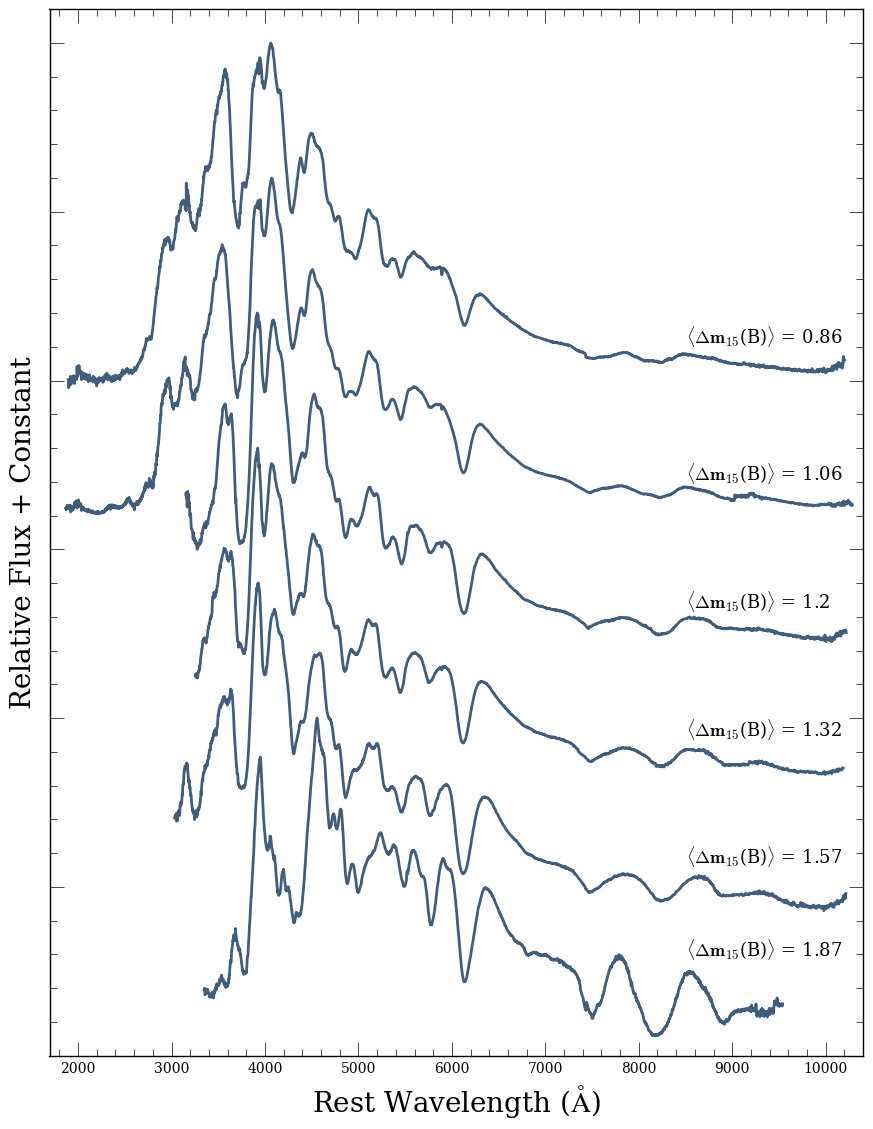

In [14]:
query_db.set_min_num_spec(comps_dm15_max_fewer_bins_mean, 5)
query_db.stacked_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/dm15_split_max')
# query_db.stacked_plot(comps_dm15_max_fewer_bins_mean)

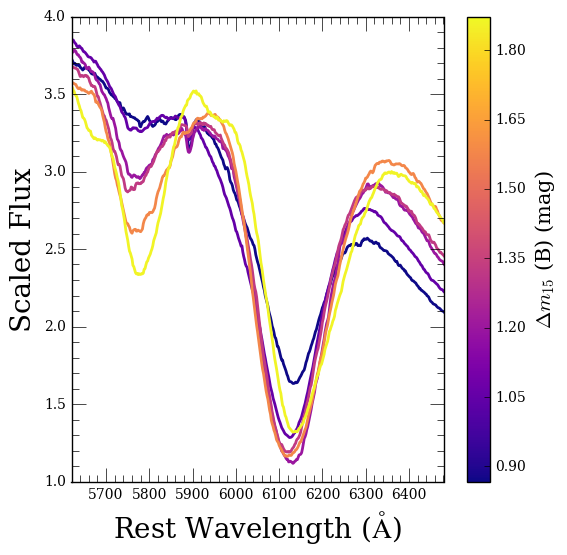

In [15]:
query_db.si_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/si_region')
# query_db.si_plot(comps_dm15_max_fewer_bins_mean)

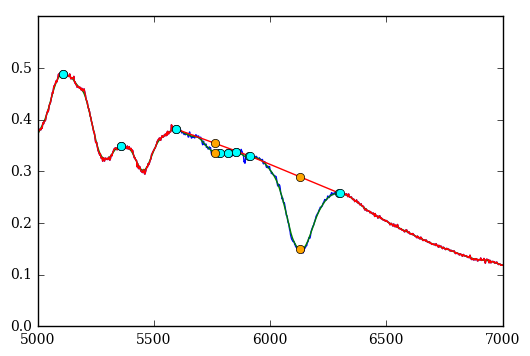

0.89 0.132486982024


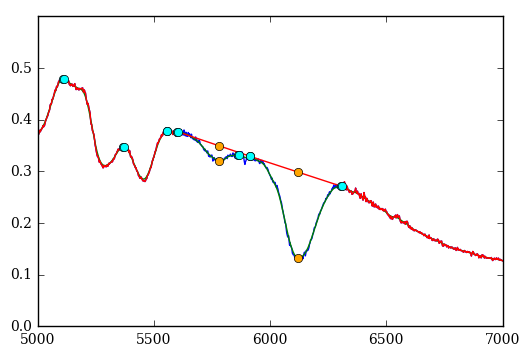

1.07 0.178392343419


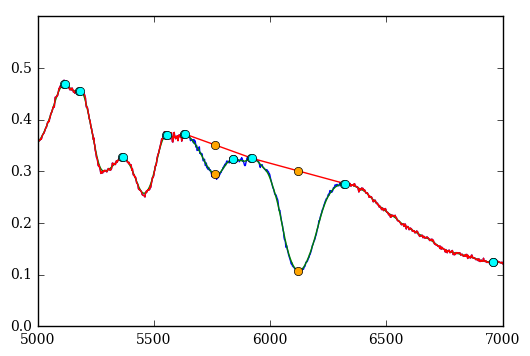

1.2 0.291317459217


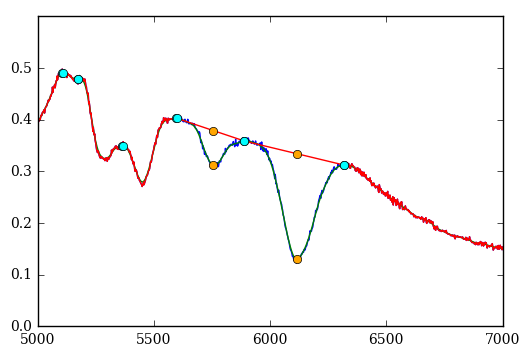

1.3 0.327776570287


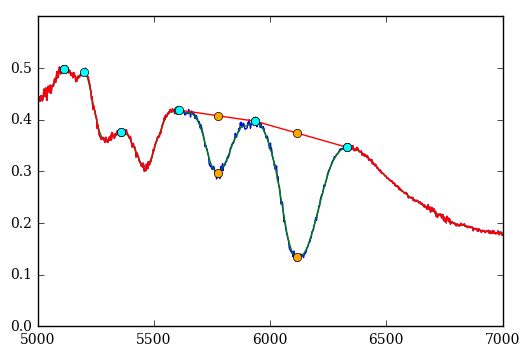

1.57 0.459300914875


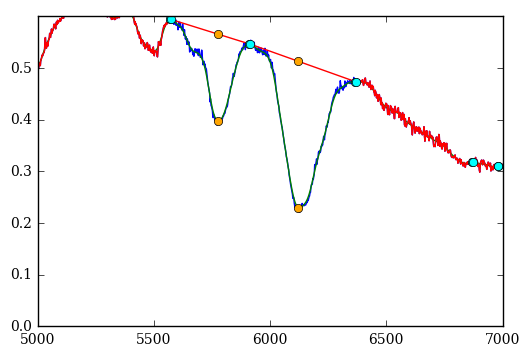

1.88 0.592901812571


In [16]:
si_ratios_med = []
phases_med = []
dm15s_med = []
for comp in comps_dm15_max_fewer_bins_med:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.002, dm15=dm15)
    print dm15, r
    phases_med.append(p)
    dm15s_med.append(dm15)
    si_ratios_med.append(r)

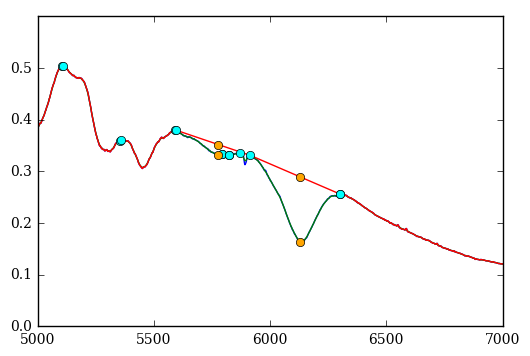

0.87 0.164363691898


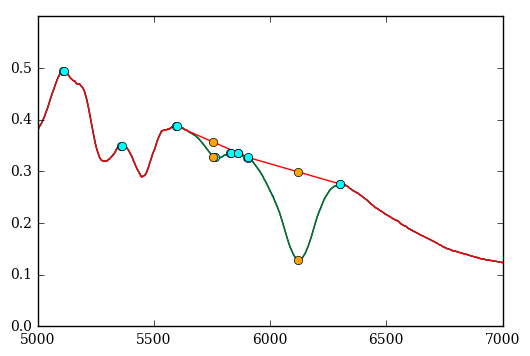

1.06 0.169352819201


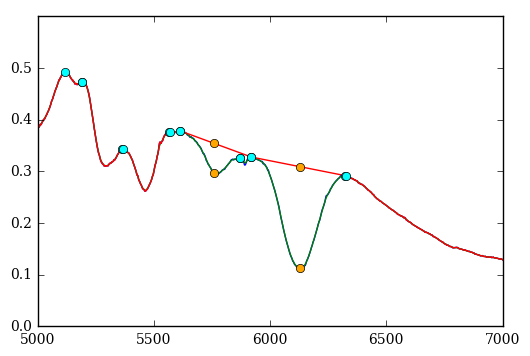

1.2 0.288677833053


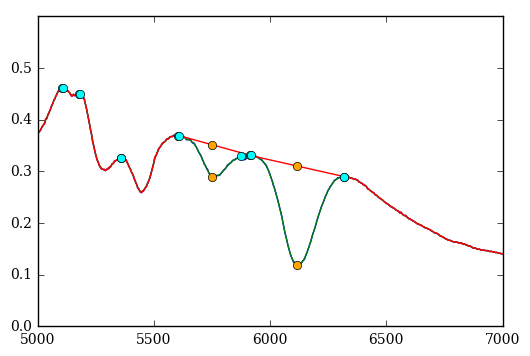

1.32 0.330770182123


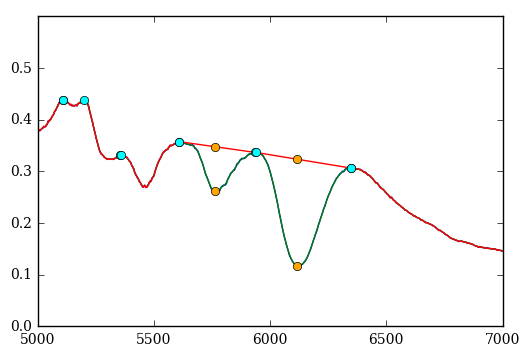

1.57 0.416150808586


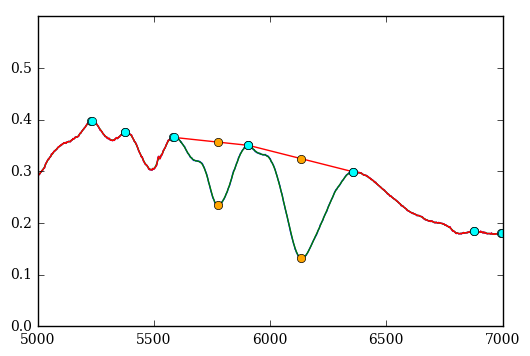

1.87 0.638298846881


In [17]:
si_ratios_mean = []
phases_mean = []
dm15s_mean = []
for comp in comps_dm15_max_fewer_bins_mean:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, dm15=dm15)
    print dm15, r
    phases_mean.append(p)
    dm15s_mean.append(dm15)
    si_ratios_mean.append(r)

In [18]:
boot_ratios_med = []
errors_med  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_med)):
    rs = []
    print k
    for comp in boot_sn_arrays_med[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
        if k != len(boot_sn_arrays_mean) - 1:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
            if ~np.isnan(r):
                rs.append(r)
        else:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False, dm15=1.8)
            if ~np.isnan(r) and r > .5: #some bad measurements below .5
                rs.append(r)
    boot_ratios_med.append(rs)

0
1


spectral_analysis.py:69: RuntimeWarning: invalid value encountered in less
  extrema_locs = np.where(abs_deriv < .0001)


Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not 

In [19]:
boot_ratios_mean = []
errors_mean  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_mean)):
    rs = []
    print k
    for comp in boot_sn_arrays_mean[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
        if k != len(boot_sn_arrays_mean) - 1:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
            if ~np.isnan(r):
                rs.append(r)
        else:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False, dm15=1.8)
            if ~np.isnan(r) and r > .5: #some bad measurements below .5
                rs.append(r)
        
    boot_ratios_mean.append(rs)

0
1
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could 

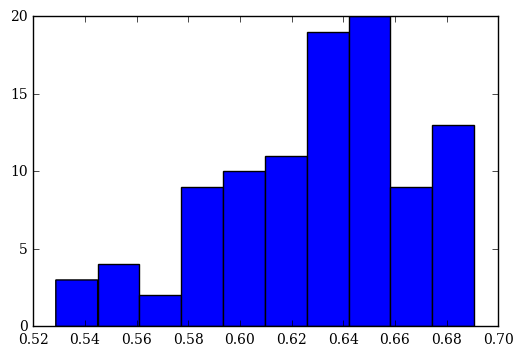

In [20]:
plt.hist(boot_ratios_mean[-1])
plt.show()

In [21]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_med = np.asarray(boot_ratios_med)
for j in range(len(boot_ratios_med)):
    r_resids = []
    r_resids.append(boot_ratios_med[j] - si_ratios_med[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_med = [low_errors, up_errors]

In [22]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_mean = np.asarray(boot_ratios_mean)
for j in range(len(boot_ratios_mean)):
    r_resids = []
    r_resids.append(boot_ratios_mean[j] - si_ratios_mean[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_mean = [low_errors, up_errors]

0
0.161993961375 131793.663108


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in divide


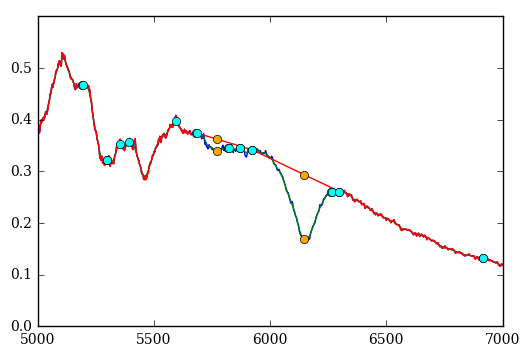

2005eq_combined 0.88 0.18367668791 Check:  0.0015 82.9770829942 80.5570871212
0.192902528813 182595.315658


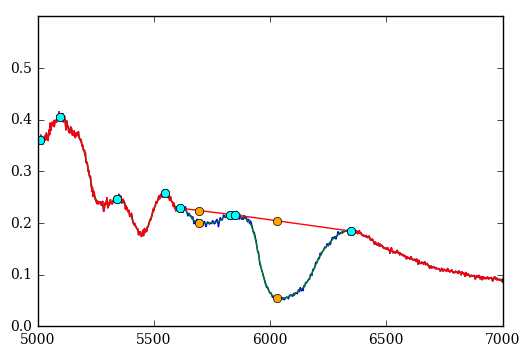

2006ot_combined 0.84 0.161964691112 Check:  0.0015 64.6679277557 66.9377069942
0.366739141891 109387.352369


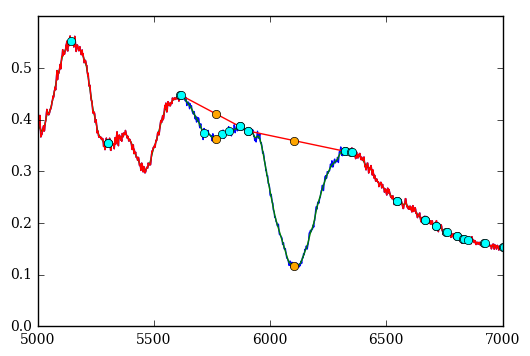

2004as_combined 0.92 0.202752292428 Check:  0.001 111.713338863 116.476862693
0.306937068708 10359.3102382


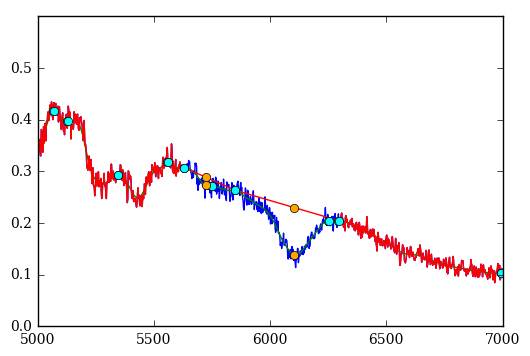

2006gr_combined 0.81 0.168811367835 Check:  0.003 28.9349150628 30.7207319848
0.115211015132 148590.700851


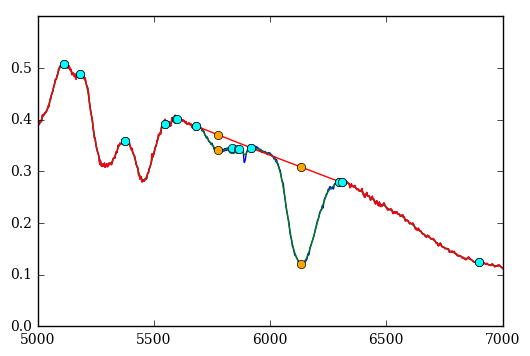

1994s_combined 0.94 0.155456087669 Check:  0.0015 73.1612160106 57.7709844722
0.403855393891 793493.591906


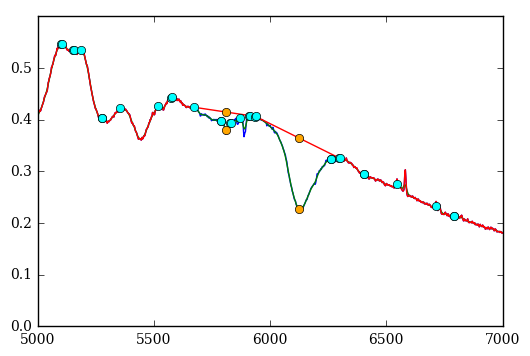

1999dq_combined 0.86 0.257273518998 Check:  0.001 311.36535713 322.133476484
0.371453027796 8384.10052616


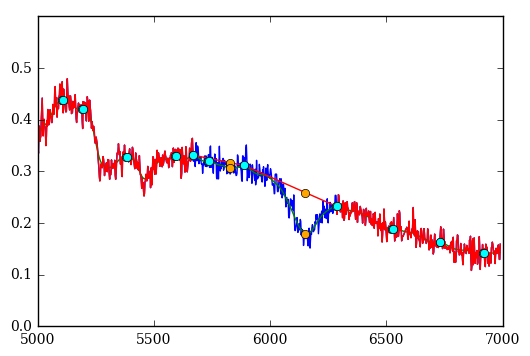

2006oa_combined 0.89 0.142631401029 Check:  0.003 30.9751182027 32.910195362
0.119202255424 258187.939205


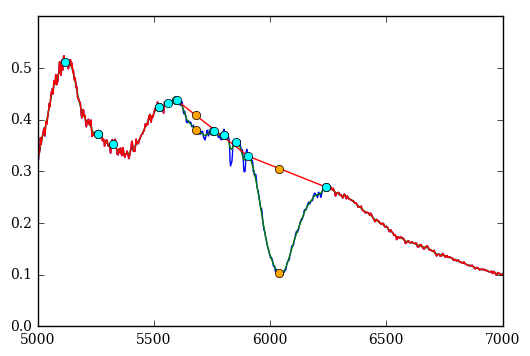

2002cd_combined 0.84 0.142336338901 Check:  0.0015 60.6060613402 54.310061498
0.144470660289 235965.72064


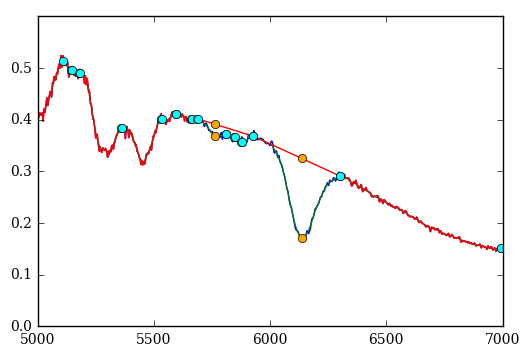

2013dy_combined 0.92 0.150370214294 Check:  0.0015 90.4833576158 79.7286593595
0.171631846715 74108.1990207


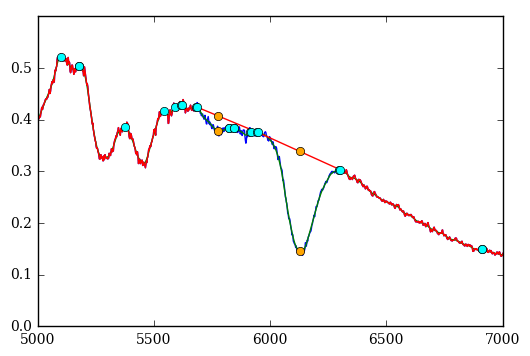

2001cp_combined 0.88 0.152361598751 Check:  0.0015 61.2395604484 55.3310169049
0.15938419991 71281.4490301


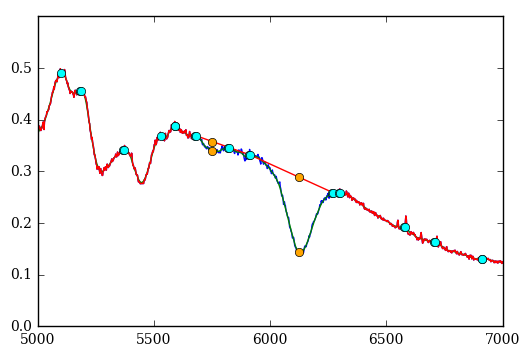

2006s_combined 0.93 0.120642917308 Check:  0.0015 73.4900923846 65.7196135078
0.182378149551 137214.910624


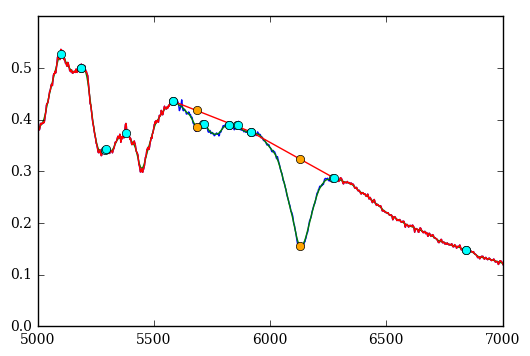

2001eh_combined 0.92 0.19299138334 Check:  0.0015 81.874582212 81.2608022489
0.0751092722421 5061.21546332
Could not find maximum in a specified range!
1991t_combined 0.898541050009 nan Check:  0.004 15.036492387 10.7499148069
0.304700896246 487000.50514


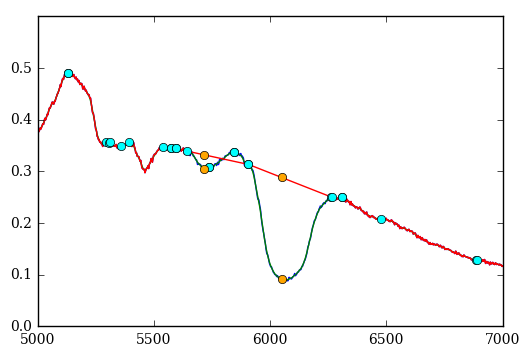

2001ay_combined 0.68 0.139029280671 Check:  0.001 165.63006918 171.916711371
0.384632988538 6619.415137


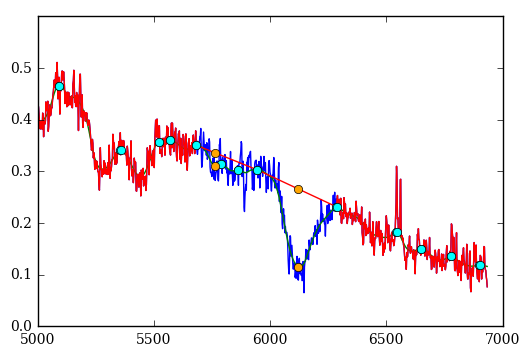

2006cj_combined 0.81 0.173840566485 Check:  0.003 26.5408775797 28.7287714075
0.135717003239 404797.535138


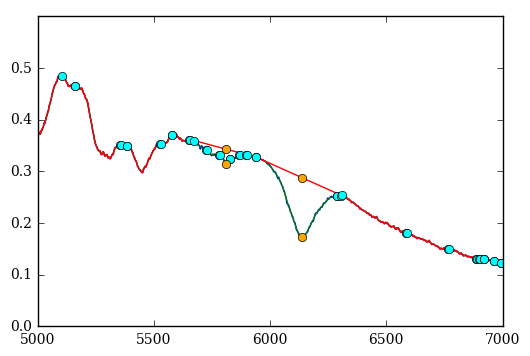

1999aa_combined 0.78 0.247255088265 Check:  0.001 139.689717911 124.736958751
0.160641899781 2083516.25579


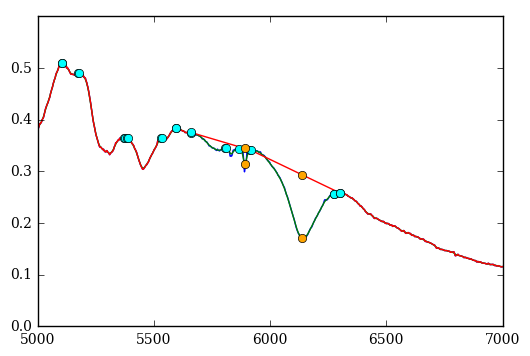

1998es_combined 0.85 0.239445755456 Check:  0.001 282.363023208 275.18354264
0.367389947247 88787.8164263


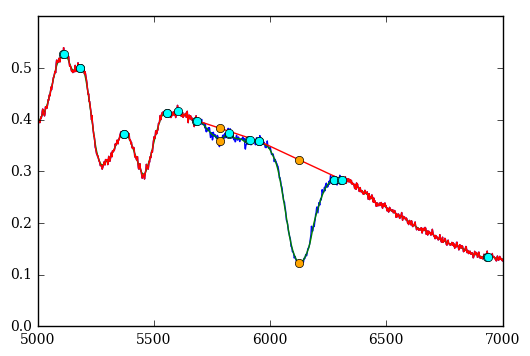

2002jy_combined 0.88 0.126585425461 Check:  0.0015 91.4480027043 99.2488652922
0.377350244932 55758.418771


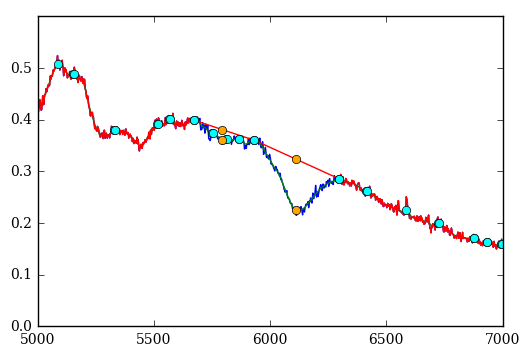

1999gp_combined 0.87 0.195161924729 Check:  0.0015 76.6899175038 80.4532594844
0.199002797637 872300.540363


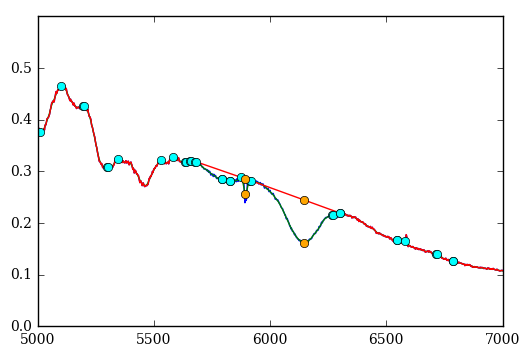

2007s_combined 0.94 0.363001316348 Check:  0.001 157.497430775 178.369571985
0.156730118404 197644.15566


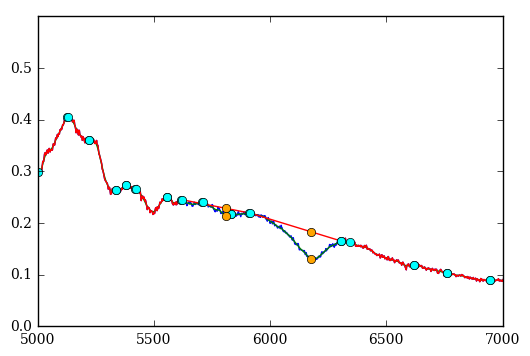

2005m_combined 0.87 0.26854012401 Check:  0.0015 82.7078115353 96.1215230374
0.155425915756 10895.8954274


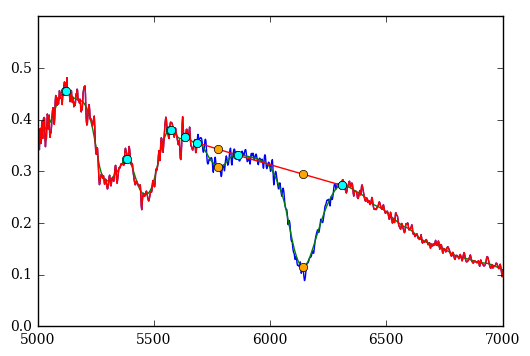

2006cq 0.938834805412 0.191768759984 Check:  0.003 22.4586067663 18.809711304
0.394857109755 21235.0989559


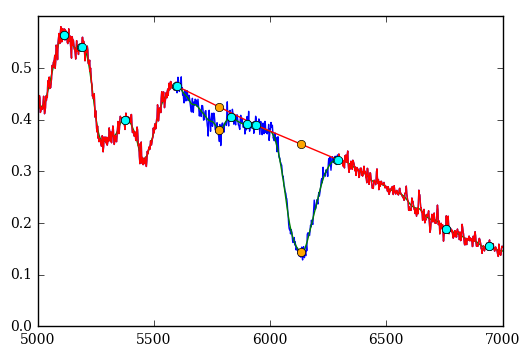

1996c 0.93 0.213546261355 Check:  0.002 49.1010844223 52.462625645
0.115797877872 183266.942014


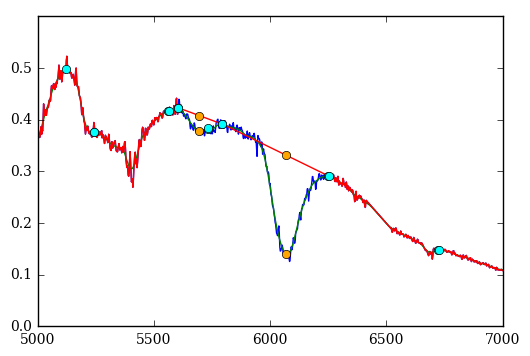

2006is 0.852109516951 0.160491393053 Check:  0.002 54.7193058149 51.6970160574
0.167909369957 26613.371493


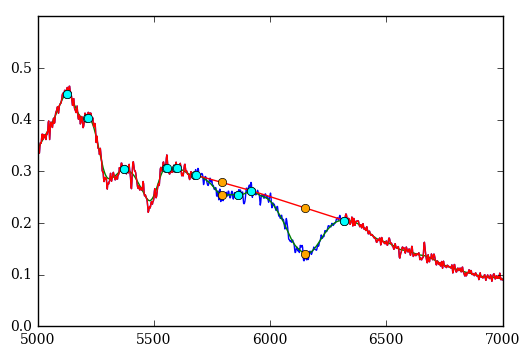

2007ai 0.852109516951 0.272240615869 Check:  0.003 29.4818363321 31.315916639
0.17901442184 256889.710327


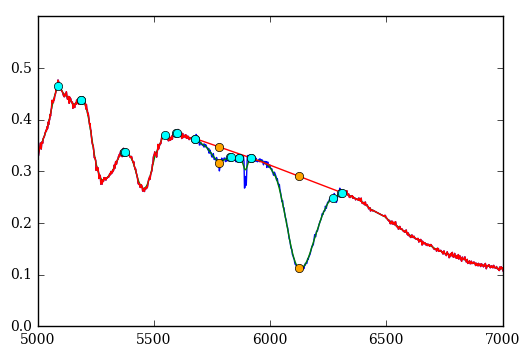

2007ca 0.89 0.173715580632 Check:  0.0015 87.2058241057 85.1513263012
0.0670803103996 1798.14215966
Could not find maximum in a specified range!
1990n 0.943599627942 nan Check:  0.004 7.30097433101 3.49275407574
1
0.265393280973 4979.2296598


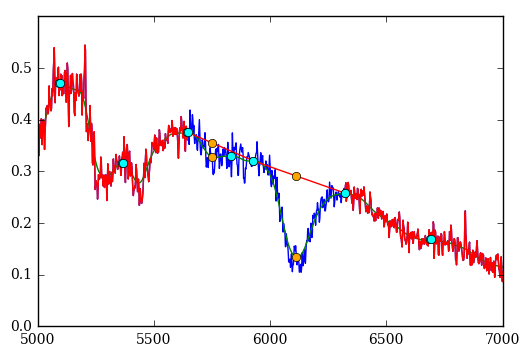

2005ag_combined 1.04651897756 0.175903075008 Check:  0.004 18.1137101254 18.8884044553
0.171691399571 11448941.9315


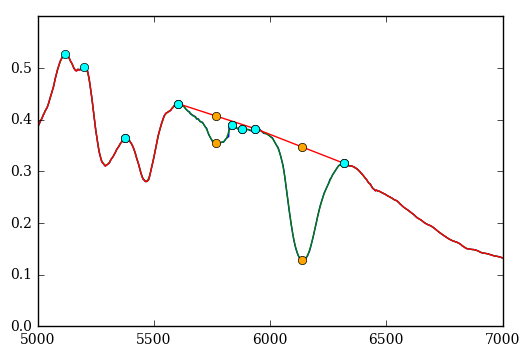

2003du_combined 1.07 0.241827504662 Check:  0.001 967.013479707 962.764975862
0.123911597714 3486513.89947


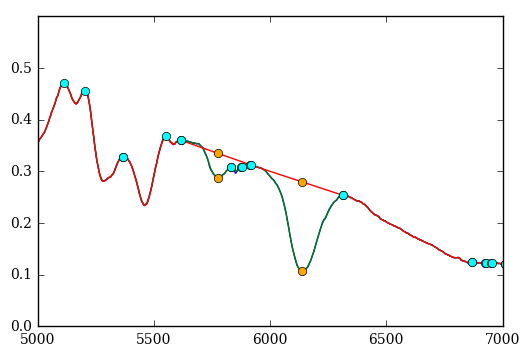

2005cf_combined 1.1 0.273935771688 Check:  0.001 381.16644384 240.499970443
0.347760510077 23335.4191689


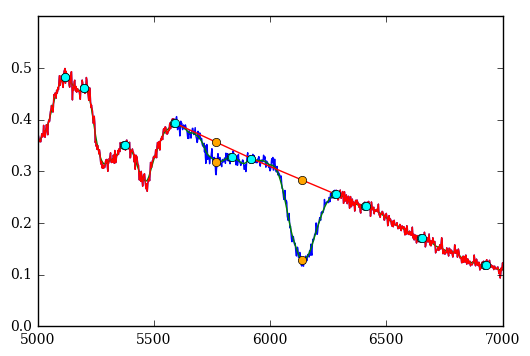

2002ck_combined 1.08 0.246830286908 Check:  0.002 44.6855114207 48.4076628808
0.321482819572 1510257.07867


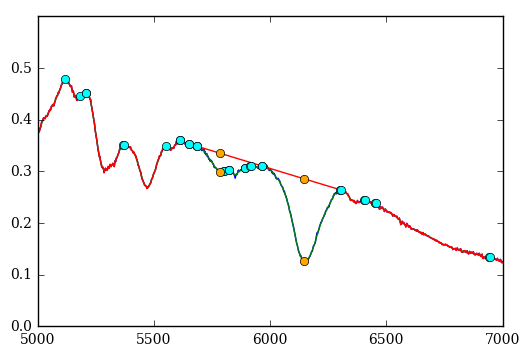

2002fk_combined 1.13 0.226073753307 Check:  0.001 343.303173923 367.763801638
0.329208183797 4947175.1894


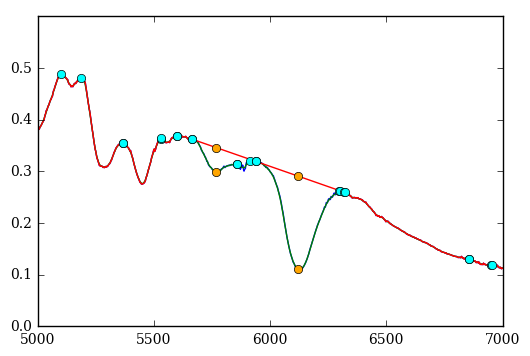

1998bu_combined 1.03 0.264266398648 Check:  0.001 606.931252439 655.841489058
0.135941919099 1677497.72135


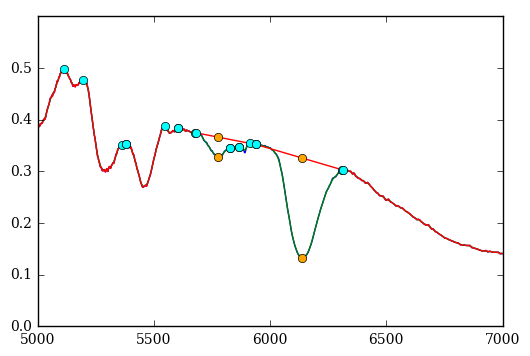

2011by_combined 1.14 0.193236926739 Check:  0.001 275.887502952 248.651926249
0.137865195893 6079870.83257


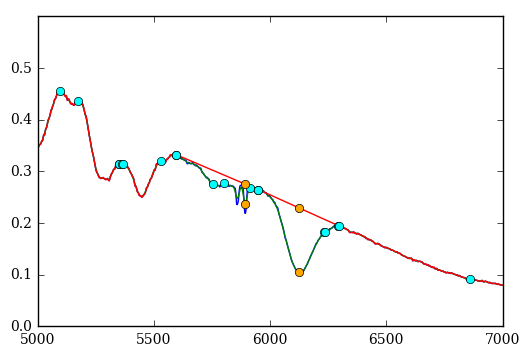

2008fp_combined 0.979300806419 0.308474531356 Check:  0.001 232.116312479 223.077481687
0.230417208994 887866.286916


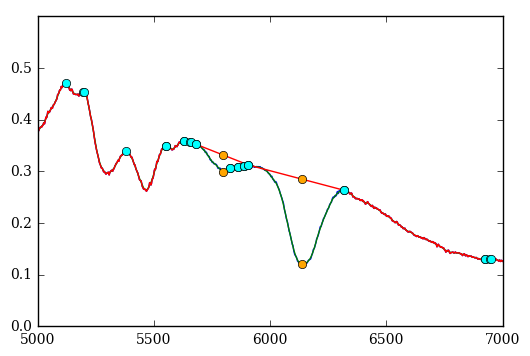

2006ax_combined 1.06 0.204768142941 Check:  0.001 190.330555416 201.357328832
0.309027528966 215371.015828


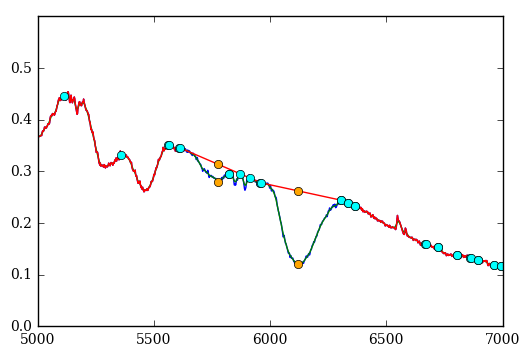

1997dt_combined 1.04 0.2340203153 Check:  0.001 120.477382764 123.236731598
0.137533935196 4111831.40786


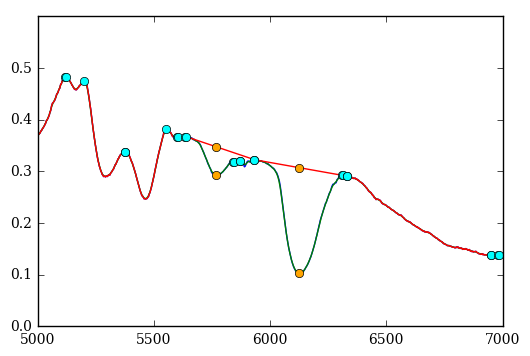

2007af_combined 1.04 0.26385151843 Check:  0.001 404.141740451 341.354100392
0.217813590399 1068796.74225


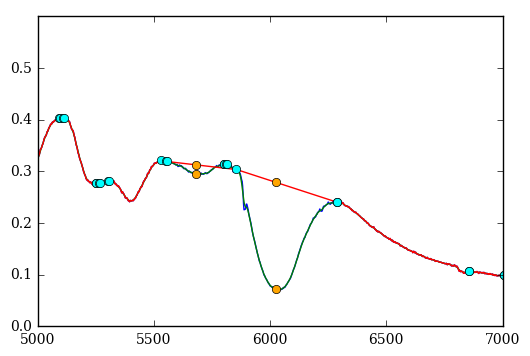

1997bp_combined 1.08 0.081508979383 Check:  0.001 182.170947641 187.204845914
0.128630903263 32842338.6131


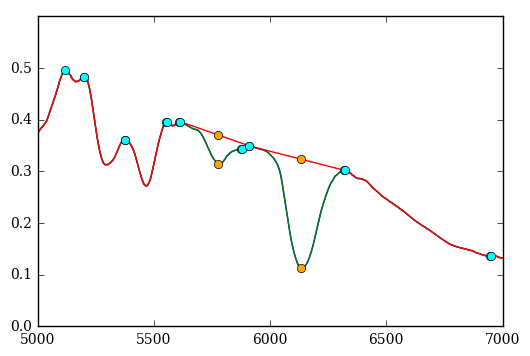

2011fe_combined 1.108 0.262517759871 Check:  0.001 1484.03080379 1693.91630793
0.124985992263 114681.111049


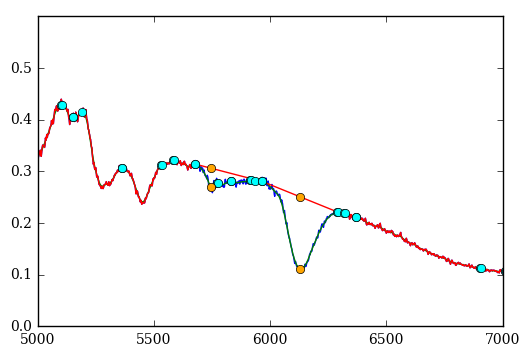

2005na_combined 1.09 0.25820517376 Check:  0.0015 63.1971277459 59.8210973462
0.25391531423 5190054.79681


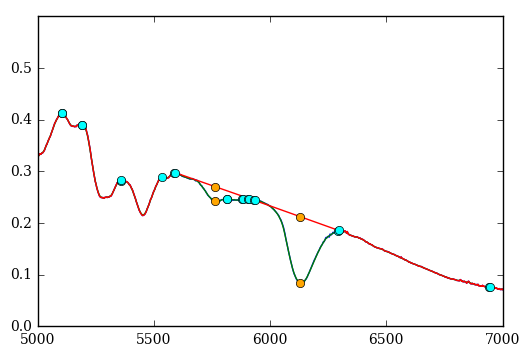

1998aq_combined 1.11 0.221429309421 Check:  0.001 524.704604737 566.661176885
0.168260998986 2842106.53044


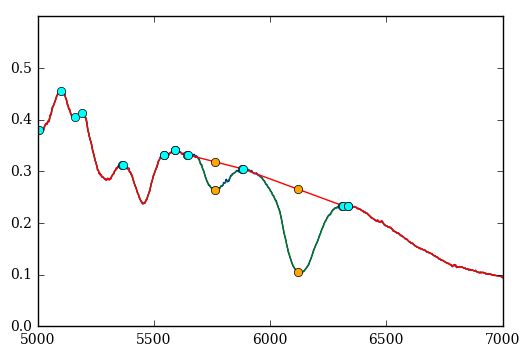

2008hv_combined 1.13369017264 0.344968908839 Check:  0.001 217.985768122 207.016218145
0.211472203498 22361.5805978


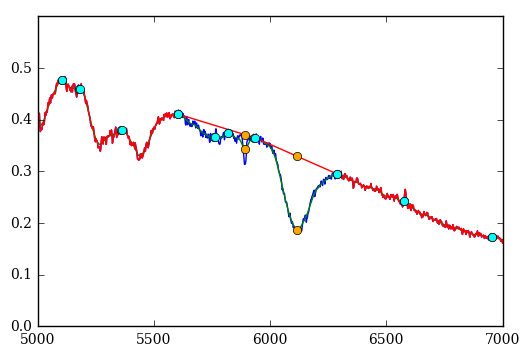

2002de_combined 0.96 0.197397908839 Check:  0.002 49.3325032931 36.1867226416
0.0747584348674 2078.46276124
Could not find maximum in a specified range!
1981b_combined 1.05664955847 nan Check:  0.004 5.66189717658 5.01594484113
0.0421385243973 1592.43791663
Could not find maximum in a specified range!
1980n_combined 1.13157052606 nan Check:  0.0045 4.28813786077 2.23424826797
0.117000300854 14352977.4051


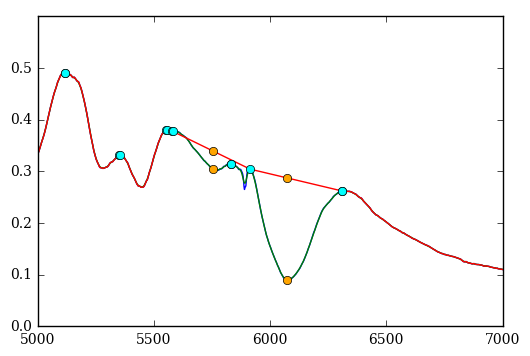

2002bo_combined 1.08 0.176812788727 Check:  0.001 509.089156585 519.079675044
0.413883452482 18361.0836202


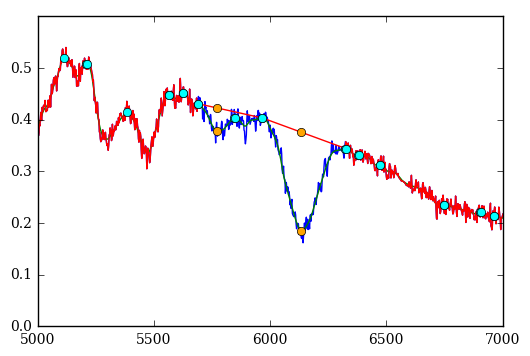

2006cf_combined 1.08357495977 0.234993639994 Check:  0.002 51.3676600728 55.48056889
0.307913697608 2163295.92761


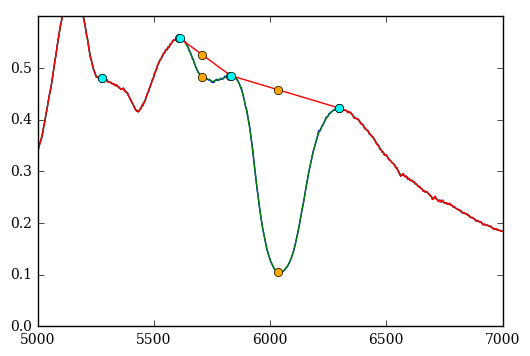

2002bf_combined 1.12 0.120995338612 Check:  0.001 408.922357984 393.142721383
0.404416572341 23593.9605153


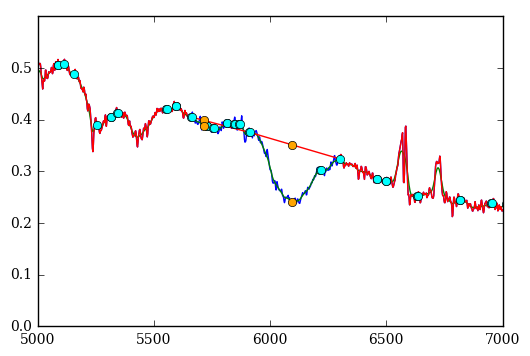

2005ku_combined 1.03987320294 0.103877034026 Check:  0.0015 63.6167707785 68.1389404932
0.175356059083 794126.107244


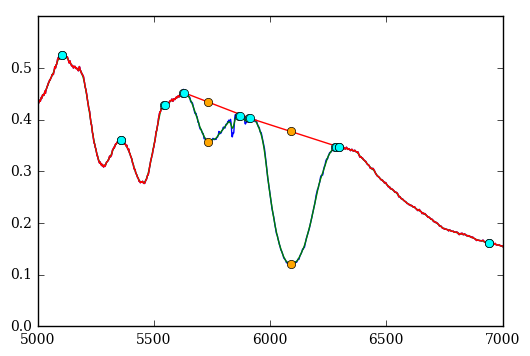

2004fu_combined 1.08 0.29878594189 Check:  0.001 200.983266926 213.937983409
0.163170261255 418708.308749


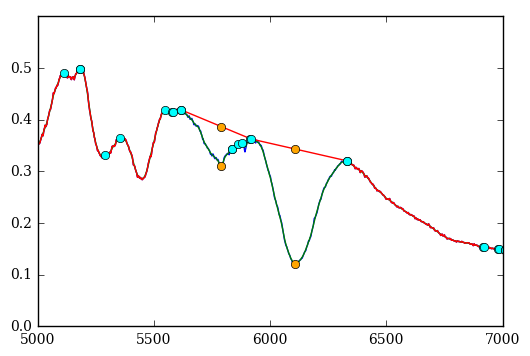

2001da_combined 1.12 0.342271284301 Check:  0.001 160.632846797 168.06295289
0.374147278605 1671333.03621


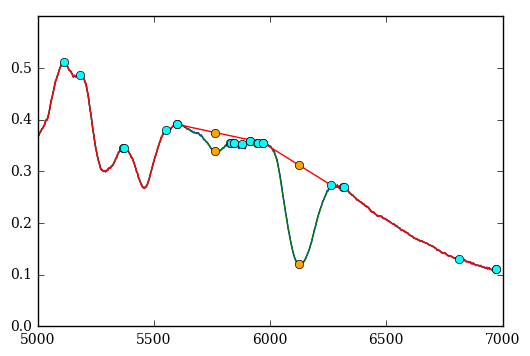

1994ae_combined 0.96 0.190308301425 Check:  0.001 413.474782476 452.161912559
0.137528176928 1290069.94745


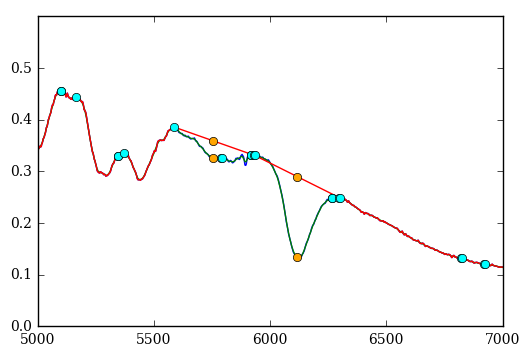

2001fe_combined 1.0 0.210591857209 Check:  0.001 202.953239548 187.580096755
0.35667803393 40986.073751


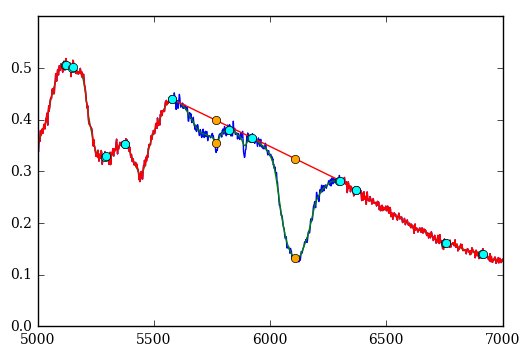

2000fa_combined 1.0 0.230912027893 Check:  0.0015 60.3070413876 64.4506237932
0.369034509881 90200.305535


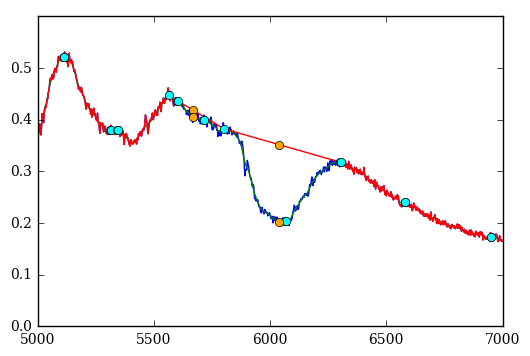

2003w_combined 1.14 0.0938881515444 Check:  0.0015 94.0566834135 92.0640448456
0.335494534998 72179.8628159


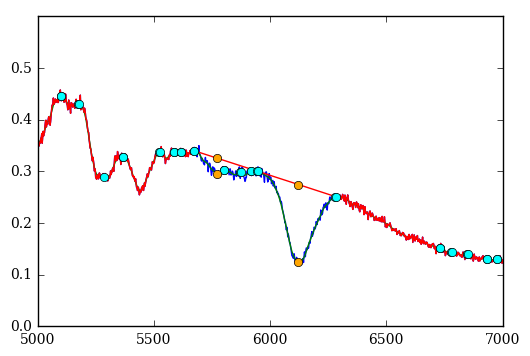

2007f_combined 0.96 0.200929743748 Check:  0.0015 76.8496815287 82.6833994728
0.151071341431 482765.941069


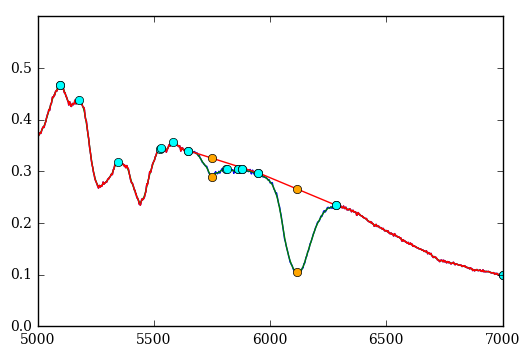

2008bf_combined 1.05 0.224797365477 Check:  0.001 122.742832337 110.301991695
0.342828537618 96328.9857033


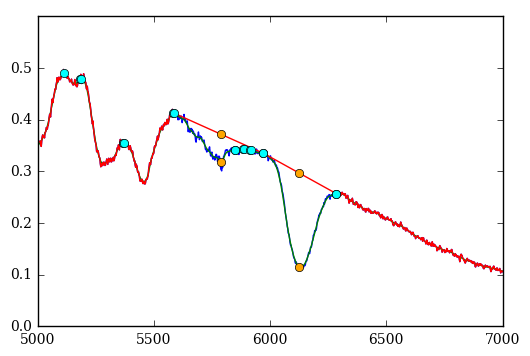

1998v_combined 0.99 0.298353581449 Check:  0.0015 89.8186272833 95.6527604015
0.122719381269 632392.213017


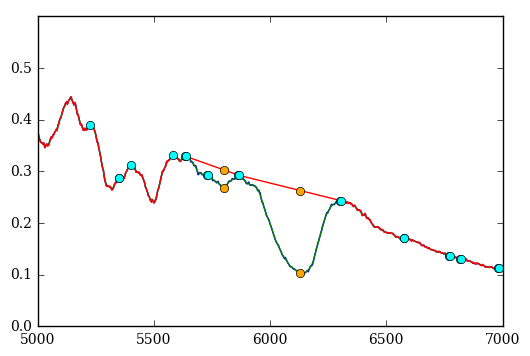

2001bf_combined 0.99 0.221507839524 Check:  0.001 117.251293531 107.056599698
0.326889515817 41477.5411955


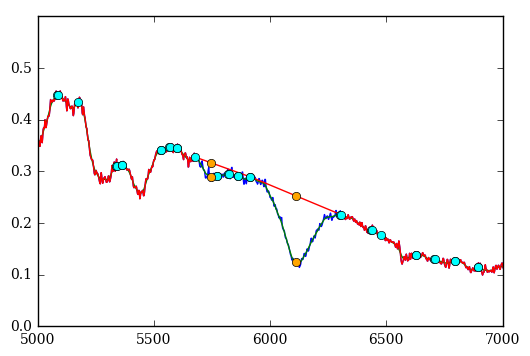

2005hc_combined 1.03 0.21111660955 Check:  0.0015 60.0090181287 61.694436493
0.143372400554 652250.130906


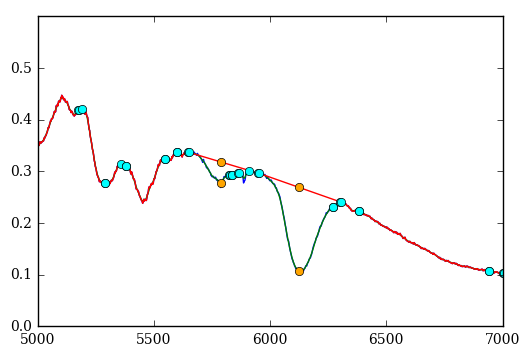

2007a_combined 0.95 0.25223677517 Check:  0.001 150.484789915 156.540399332
0.153817450272 2047914.27801


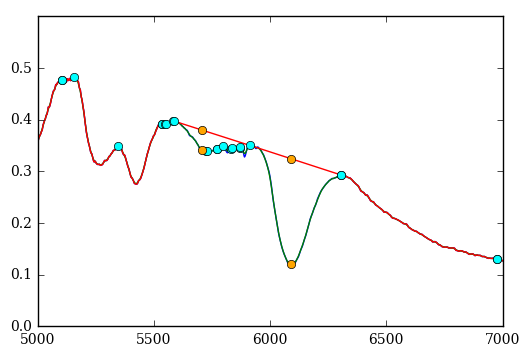

1998dk 1.05 0.193172187492 Check:  0.001 269.472964709 225.833313606
0.156192452024 16649.998951


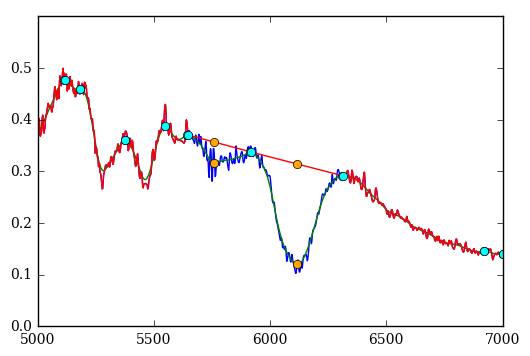

2005ms 1.02142208206 0.204910420521 Check:  0.003 29.9997470927 27.7512572086
0.162203480536 39476.4248789
Could not find maximum in a specified range!
2006or 1.06267601692 nan Check:  0.003 37.2200959331 32.770383588
0.161121397016 47501.7863201


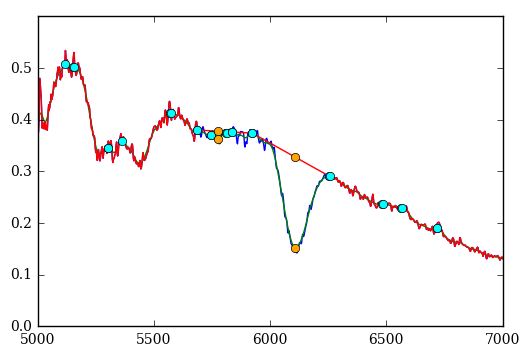

2007bz 1.05 0.0844775724779 Check:  0.002 41.9339199169 40.7215753614
0.153504305694 645215.441678


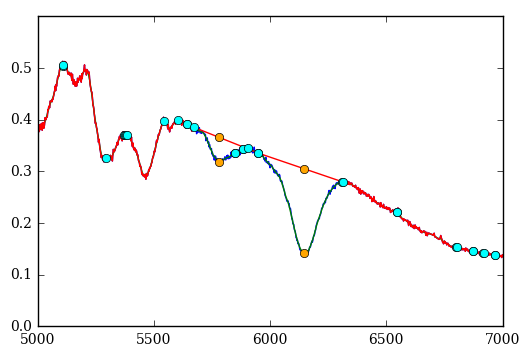

2007o 1.13613975141 0.28716895626 Check:  0.001 126.929950834 122.09537492
0.416812753219 641.551181215


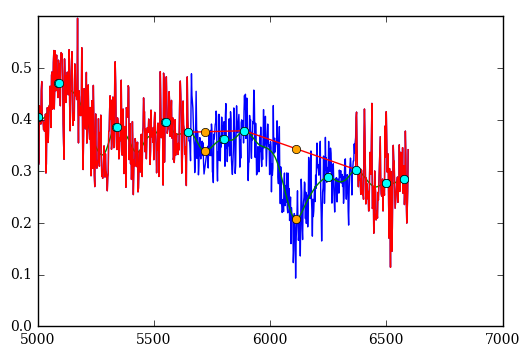

1996ab 1.01 0.277705646996 Check:  0.004 9.88474485181 10.2248512023
0.369282543339 13267.7400835


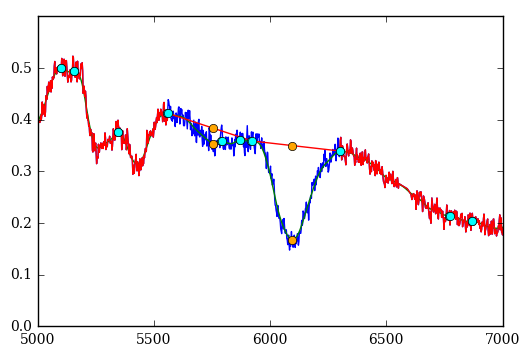

1996bl 1.07 0.1647591821 Check:  0.003 36.8294304067 37.4449261727
0.340523399354 24975.1168182


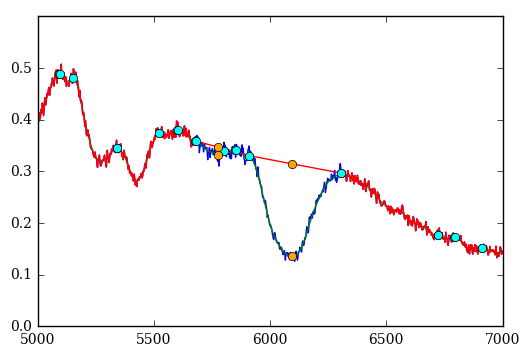

1998ec 1.08 0.0901768256607 Check:  0.002 46.180959185 48.1948878696
0.344735238283 35107.2922492


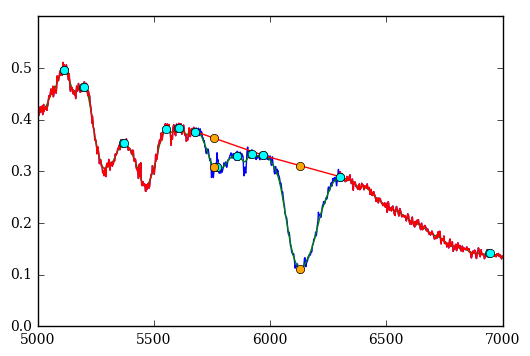

1998eg 1.14 0.280708200898 Check:  0.002 57.4152030737 61.3341157587
0.396438998371 9957.03228563


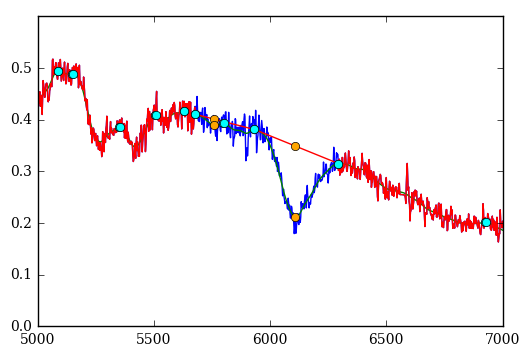

2001az 1.09 0.0857491203761 Check:  0.003 35.2641812437 36.3542529791
0.376813169915 71760.9237542


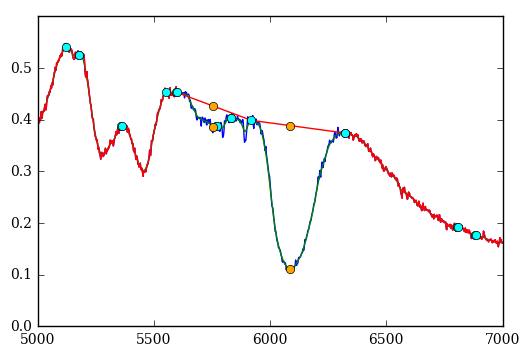

2001en 1.12 0.145045970242 Check:  0.0015 87.0916810669 91.9202350873
0.326414688229 6324.3540423


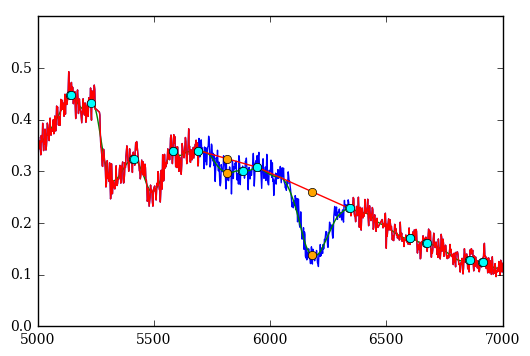

2002hu 1.05 0.22364050063 Check:  0.003 22.5704251172 23.8682813254
0.36408050467 47744.8589233


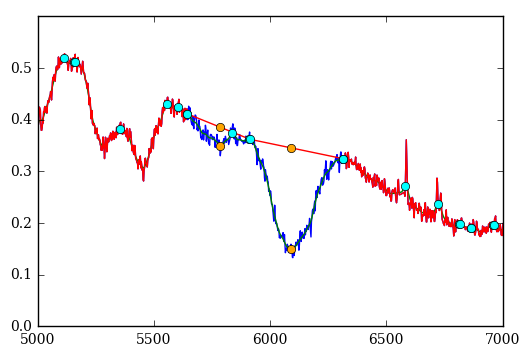

2003kc 1.14019986122 0.183528336837 Check:  0.0015 74.2623089089 76.5643723896
0.341952416021 17522.1607544


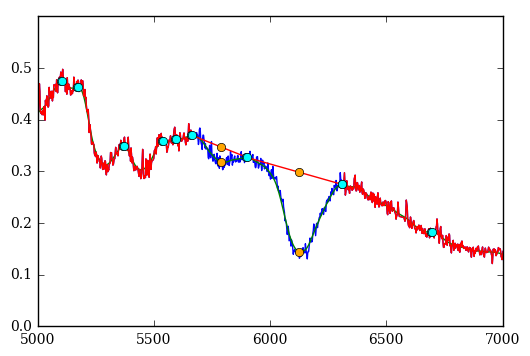

2004bg 1.05 0.193190958245 Check:  0.003 39.4603496405 42.0932504084
0.388666775948 2697.83913558


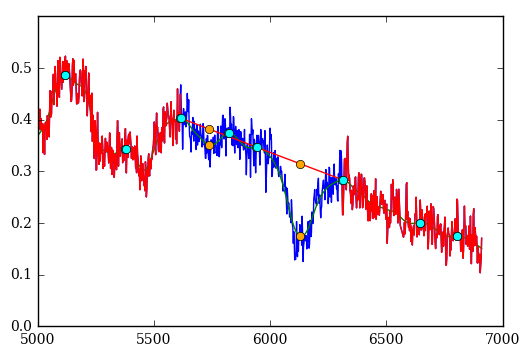

2007ae 0.98 0.223391937019 Check:  0.004 17.9823441125 18.9312262903
0.237214321634 24888.1685353


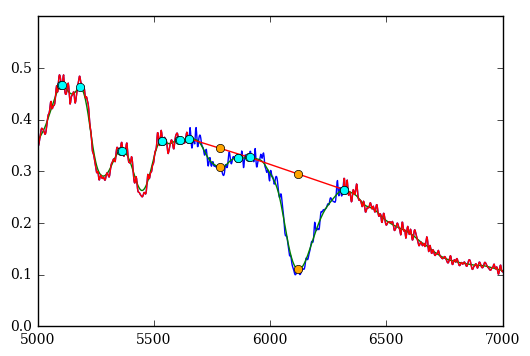

2004ey 1.00821961936 0.202318851961 Check:  0.003 32.2443438422 35.6110499029
0.211158630728 101960.252875


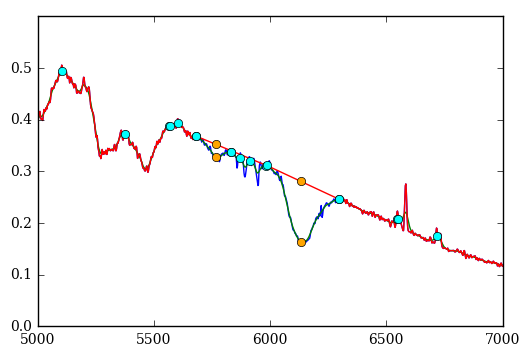

2005bg 1.06633511992 0.207721687147 Check:  0.0015 66.0724133564 61.5188801541
0.318590997623 14289.0887653


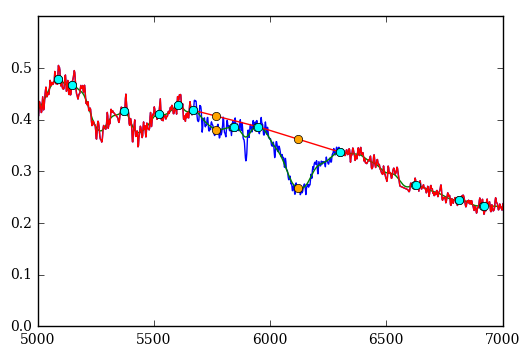

2006hx 1.05273249926 0.275742297377 Check:  0.003 37.2248703219 40.6443484778
0.149374854493 28544.7481741


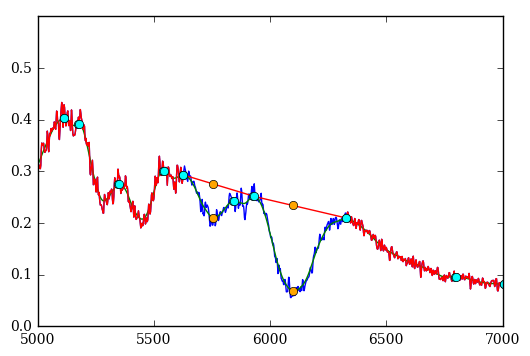

2006os 1.07098749844 0.395008240952 Check:  0.003 20.1474155996 20.9915750298
0.209702059362 73041.4262657


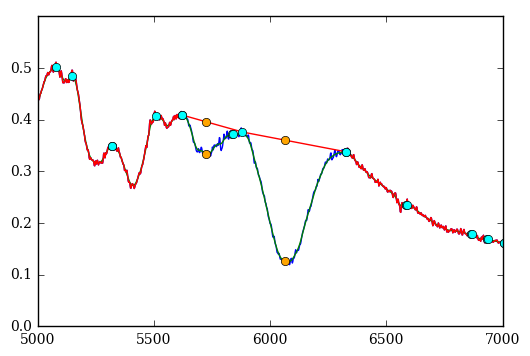

2007as 1.11396538206 0.2630879477 Check:  0.0015 65.5316811215 70.8910937336
0.205213621013 97656.7893934


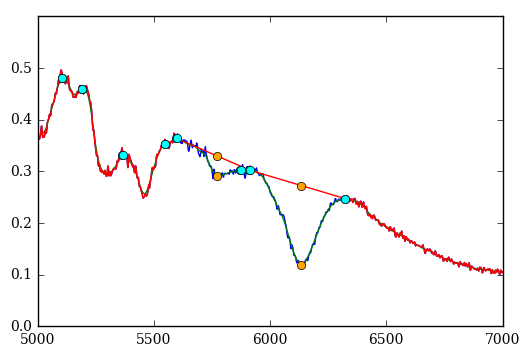

2008bq 1.00130644601 0.246973225425 Check:  0.002 55.9979369384 59.4741697838
0.485154999116 54611.9458314
Could not find maximum in a specified range!
2001ba 1.03352873666 nan Check:  0.001 124.755430238 119.958294489
0.420342039691 130479.068951
Could not find maximum in a specified range!
2012cg 1.039 nan Check:  0.001 153.451909226 163.417632742
2
0.112963310042 638670.443976


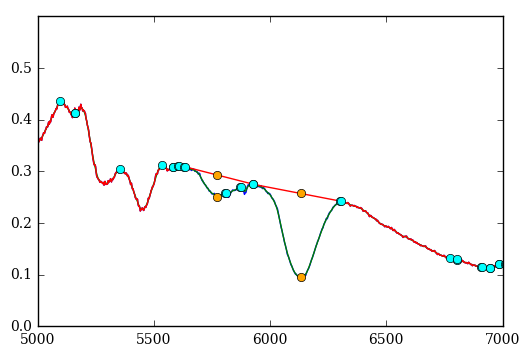

1995e_combined 1.16 0.258029786579 Check:  0.001 110.423358507 99.1699157915
0.148007285437 2577489.42377


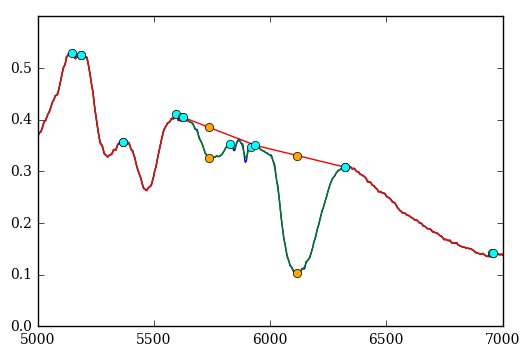

2002er_combined 1.23 0.257355105284 Check:  0.001 426.952120944 410.008592997
0.162097379334 25121.3051011


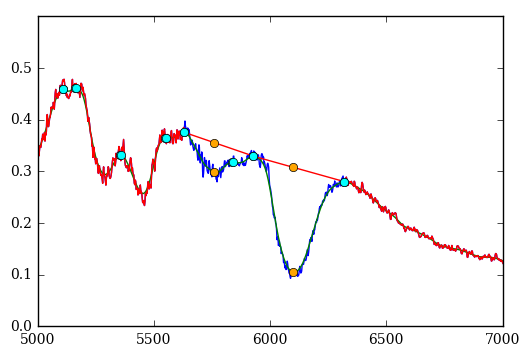

2003cq_combined 1.2 0.281491766385 Check:  0.003 35.300446025 29.7421174707
0.313487206503 60498.9780093


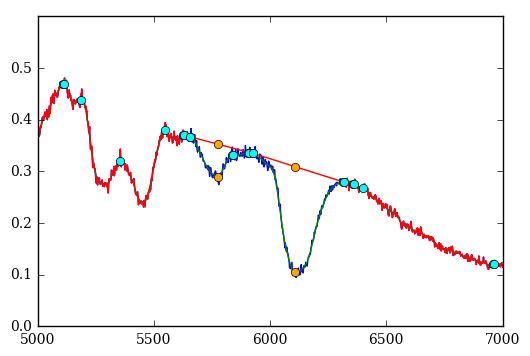

2002kf_combined 1.2 0.314648171241 Check:  0.0015 66.516508214 72.0686280694
0.263562858759 633378.672961


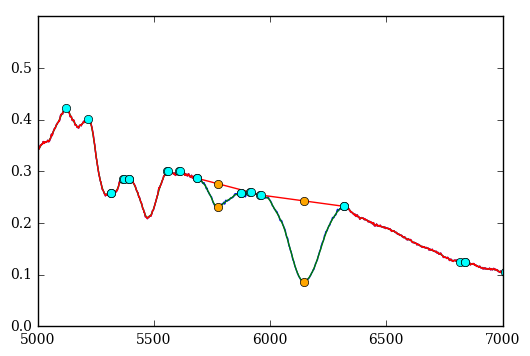

2002cr_combined 1.19 0.286129315998 Check:  0.001 189.866563238 202.707461998
0.129516803746 1864813.04432


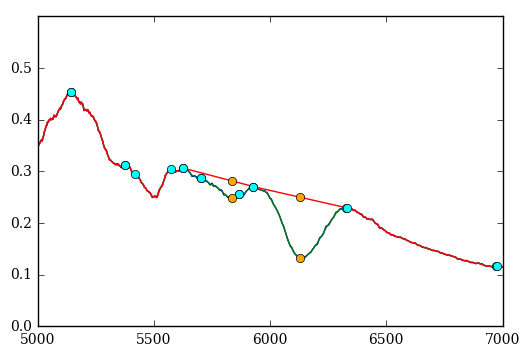

1999ac_combined 1.23 0.281294486106 Check:  0.001 229.676254127 208.709212323
0.138345438632 758957.937732


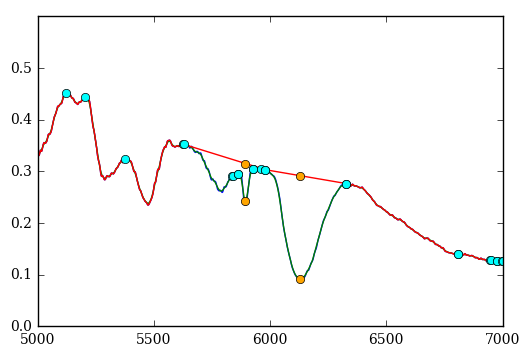

1999gd_combined 1.18 0.362706944916 Check:  0.001 157.106729055 151.314099797
0.224930738255 30759.9378473


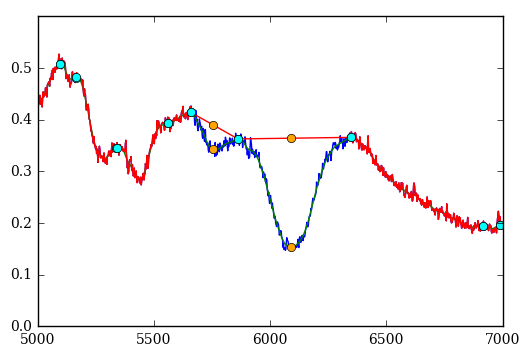

2007jg_combined 1.17 0.226041386621 Check:  0.002 50.2499588446 55.0317328441
0.283010799738 119583.265318


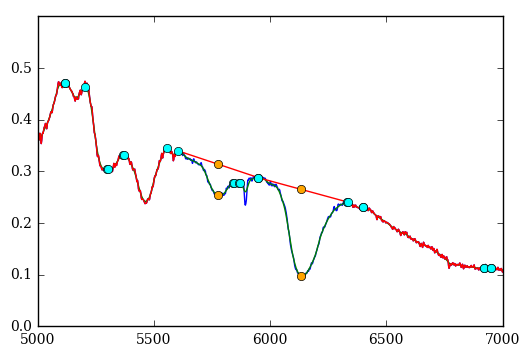

2005kc_combined 1.24 0.357841780187 Check:  0.0015 89.1346392066 95.3004459558
0.132036227394 302912.945411


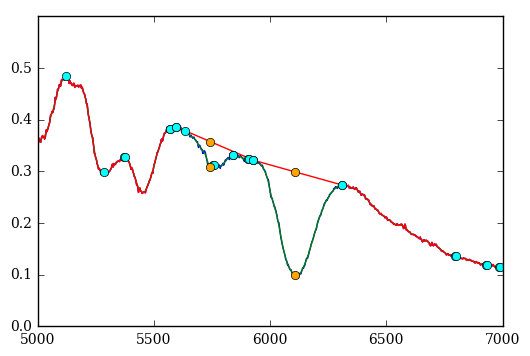

2007co_combined 1.16 0.242766119312 Check:  0.001 103.357707865 84.2013361038
0.208533647317 173143.907291


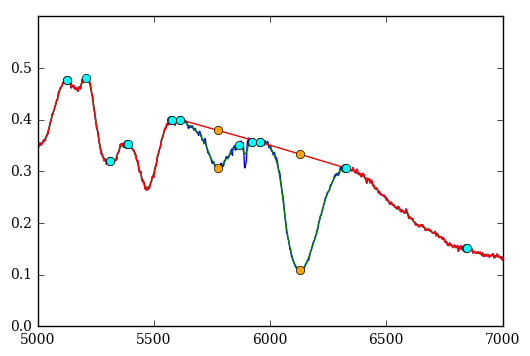

1997y_combined 1.15 0.319641982797 Check:  0.0015 95.7223293823 90.8522105117
0.179943963978 696372.747168


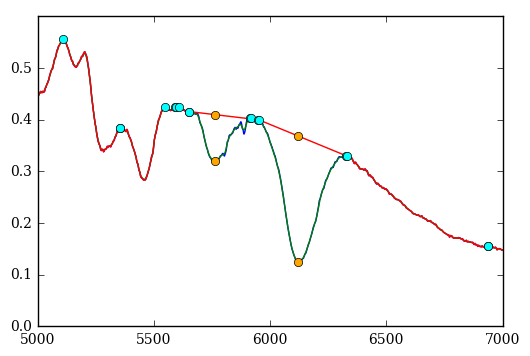

2002ha_combined 1.22 0.369844098382 Check:  0.001 215.848461095 204.977463736
0.316644939612 36298.712937


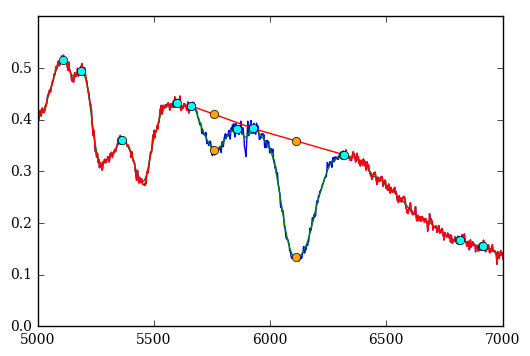

2003ch_combined 1.22 0.308807754113 Check:  0.002 56.7741098009 53.5738965762
0.160885466577 352042.577898


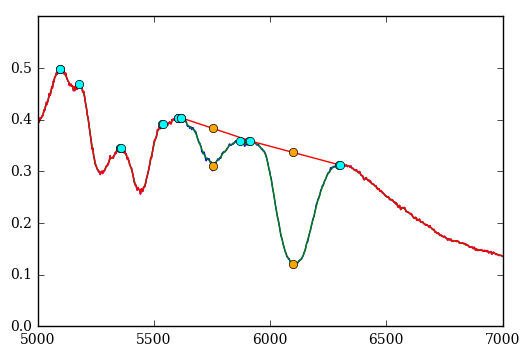

2006sr_combined 1.24 0.337071882925 Check:  0.001 134.834279929 119.537194988
0.0782056287961 1032.64262912


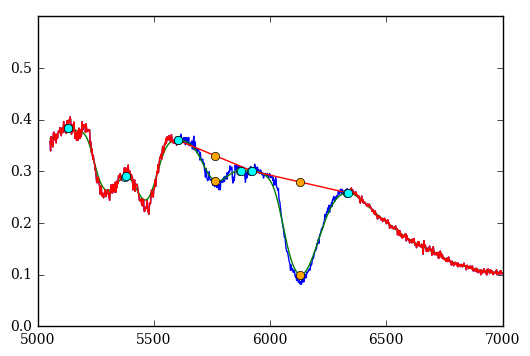

2005w 1.22957865079 0.269455208239 Check:  0.0045 3.55052155664 2.6092297517
0.304548386131 160097.500726


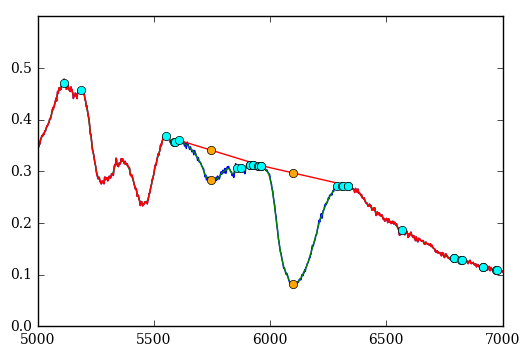

1998dh 1.17 0.269737353199 Check:  0.001 105.028769579 111.086683295
3
0.247388244354 3318762.76581


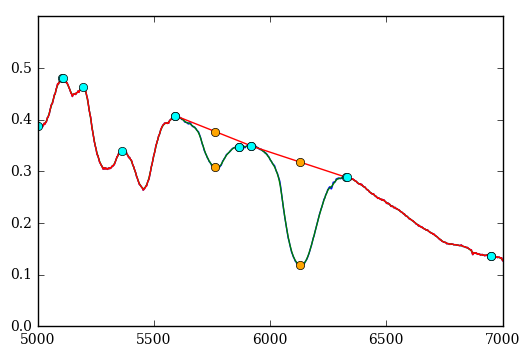

1994d_combined 1.37 0.344165323468 Check:  0.001 398.555320259 420.691462644
0.37738021321 380776.060679


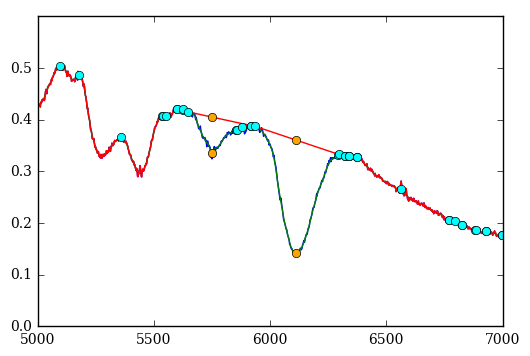

2003it_combined 1.36 0.316191470987 Check:  0.001 204.979949765 216.694522964
0.131837529068 7082276.32637


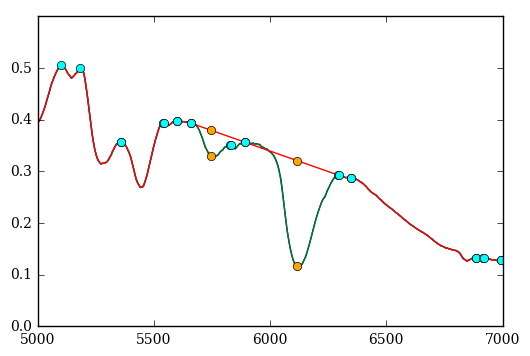

1996x_combined 1.26 0.24382814931 Check:  0.001 546.644303662 433.247863292
0.364786101323 10383.7808167


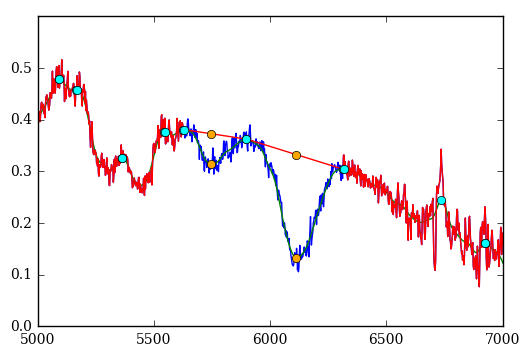

1998dx_combined 1.32 0.291658376342 Check:  0.003 33.4805589288 35.8914774789
0.324426328435 250618.560913


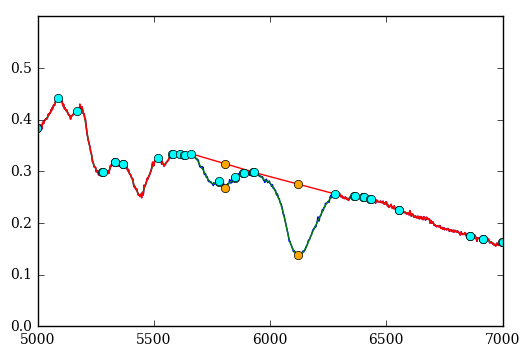

2005el_combined 1.27 0.343092254361 Check:  0.001 144.726818632 155.100204815
0.22453767399 57376.4434199


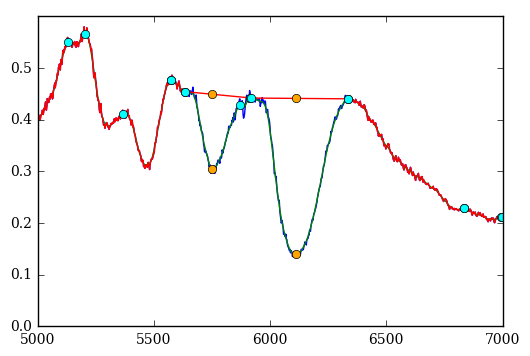

2004gs_combined 1.41 0.482343603686 Check:  0.0015 70.703721846 64.283861518
0.1556130279 3140314.51172


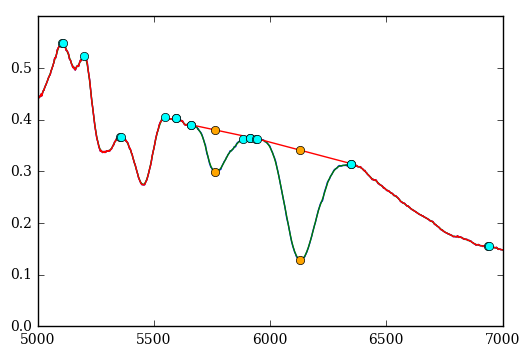

2006d_combined 1.35 0.382043689868 Check:  0.001 362.747508657 373.151548009
0.143985289426 1229753.97176


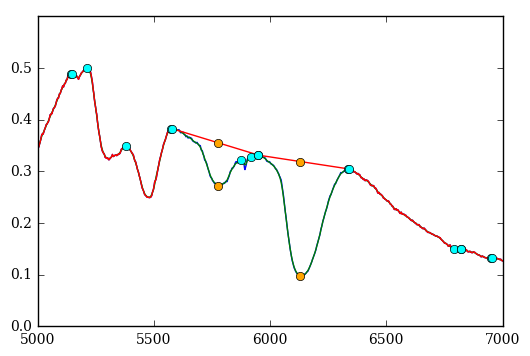

2001ep_combined 1.3 0.375166105802 Check:  0.001 199.352019801 189.627408735
0.223049508687 34228.217951


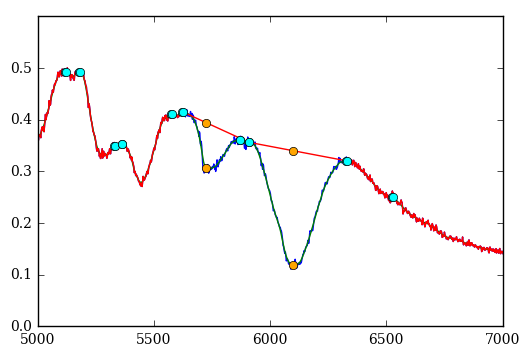

2004ef_combined 1.39 0.393726345971 Check:  0.0015 64.3230651829 75.9594723194
0.357566236007 36545.990684


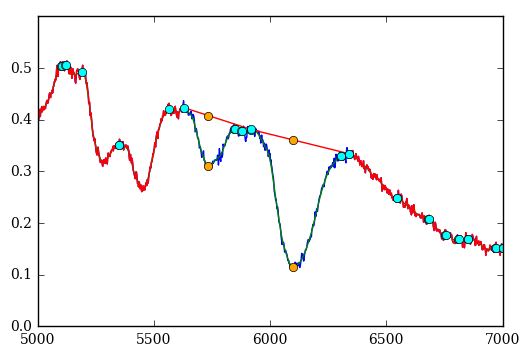

1999cc_combined 1.35 0.392962338813 Check:  0.0015 61.5352491865 66.5595362307
0.29684644387 1269038.80259


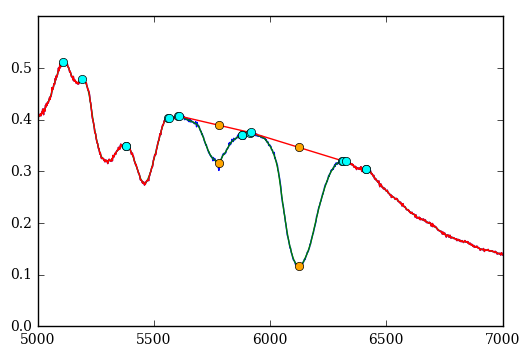

2005ki_combined 1.41 0.321689927194 Check:  0.001 218.529872366 226.072035377
0.245298408607 100133.360531


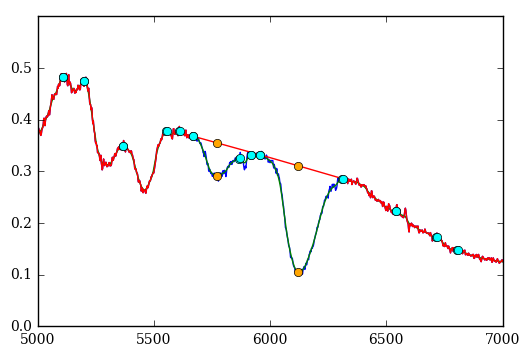

2005bo_combined 1.28 0.316681606247 Check:  0.0015 61.9769183187 67.7893318395
0.27670069753 79678.4610604


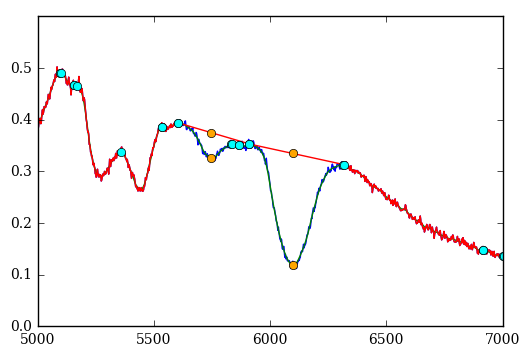

2007bd_combined 1.3 0.226747613427 Check:  0.0015 69.3235901655 79.0904342212
0.119626483456 315929.558565


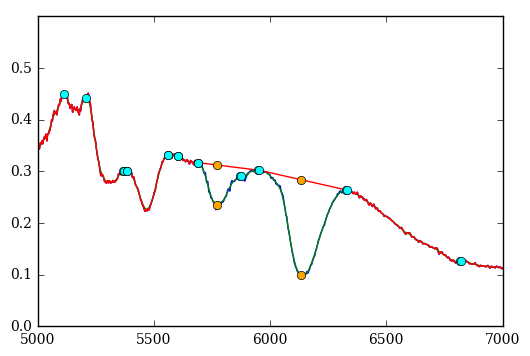

2007bc_combined 1.37 0.422318458747 Check:  0.0015 91.5013137846 87.6572371467
0.13635410797 157347.108058


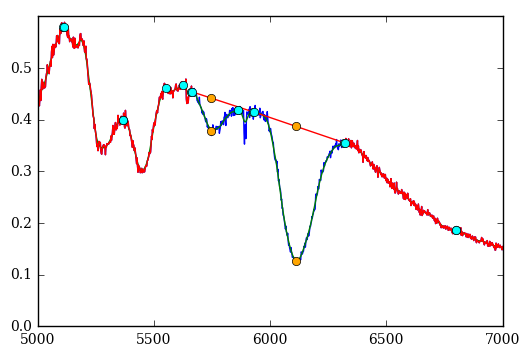

2005lz 1.34 0.241827628863 Check:  0.0015 67.6315411108 67.2021744101
0.167503436918 373352.449404


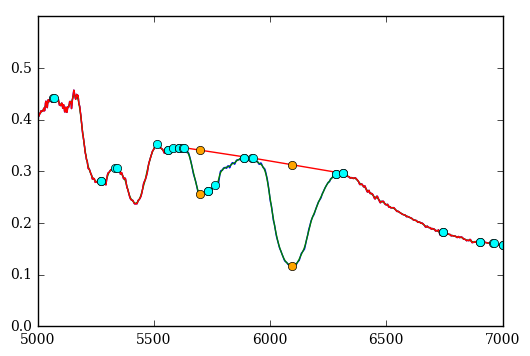

2006ej 1.26659174257 0.431675096142 Check:  0.001 119.032936127 107.94997635
0.423152681217 7431.71093631


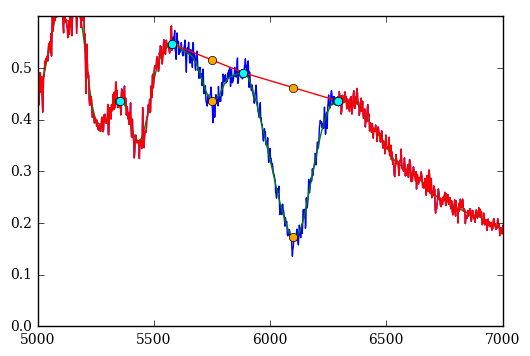

1994m 1.26 0.269931511686 Check:  0.003 26.7648188158 26.5734090305
0.4036181546 30191.3969472


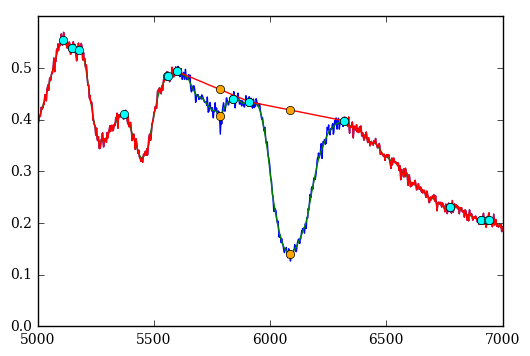

1998ef 1.27 0.186677173038 Check:  0.0015 62.5605373314 65.6590338618
0.344538073671 5945.11417275


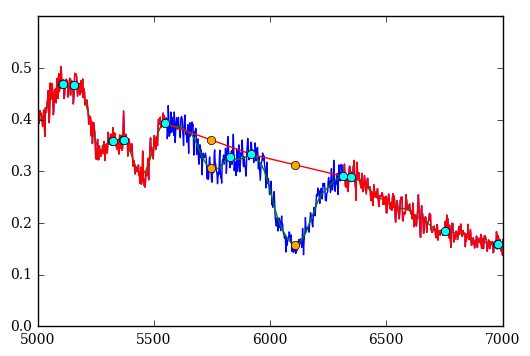

2002g 1.25 0.353342756558 Check:  0.003 23.0129184481 23.2306162189
0.370754130926 4006.85493722


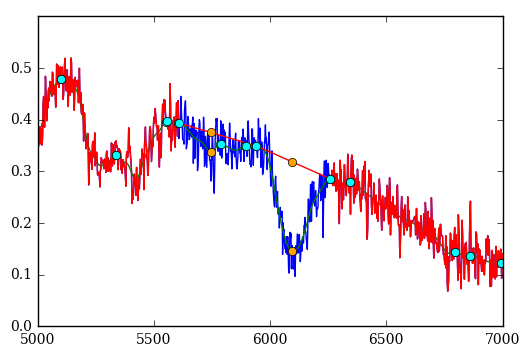

2003ic 1.30686535341 0.221627051816 Check:  0.003 21.9067776718 22.7842597003
0.307692811824 30327.4301365


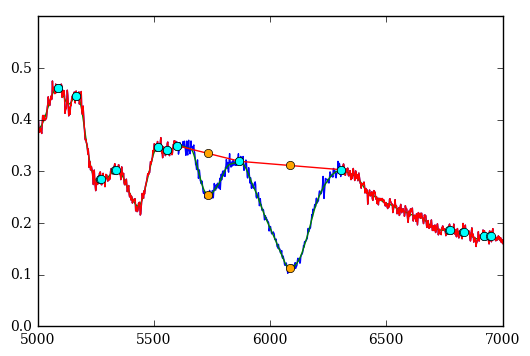

2005am 1.3 0.400310362673 Check:  0.002 51.4679921485 53.4674841717
0.351038867003 10802.9416775


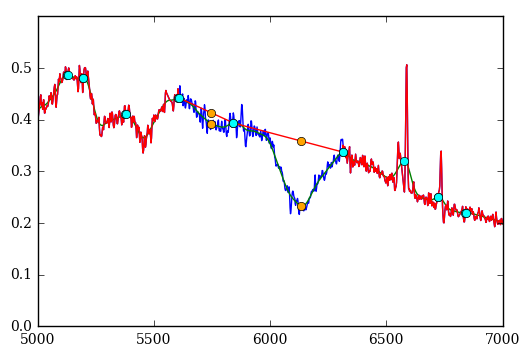

2006fw 1.28774437183 0.168759823864 Check:  0.003 33.8606225789 29.9279198719
0.197708092779 52624.0520306


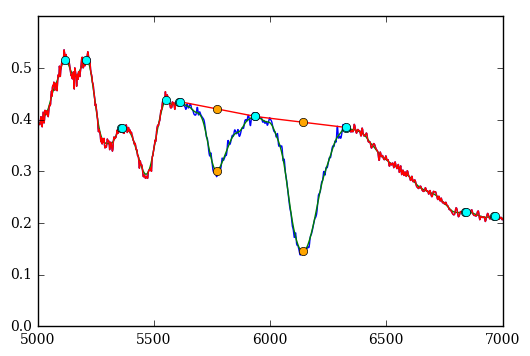

2015f 1.26 0.481629888256 Check:  0.002 51.6019580676 44.7480824439
4
0.0897387089484 4925.35052297
Could not find maximum in a specified range!
1992a_combined 1.47 nan Check:  0.004 13.0989022503 6.85695717445
0.144273295179 197107.18095


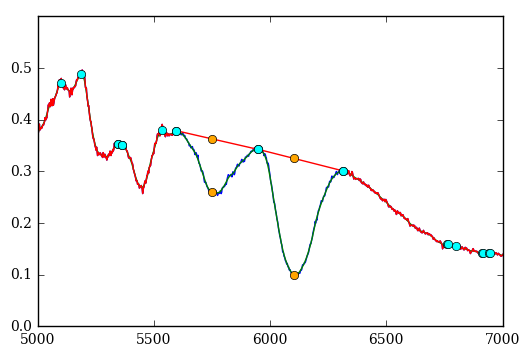

2007ci_combined 1.6 0.456653643885 Check:  0.0015 89.1726271267 78.5451067308
0.1842781562 453161.679715


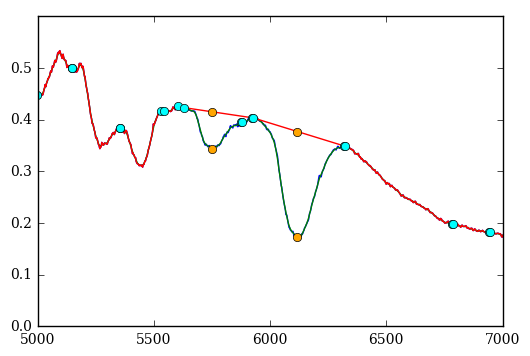

2006n_combined 1.5 0.351437012775 Check:  0.001 138.444828013 94.4811076291
0.368974016923 151017.891374


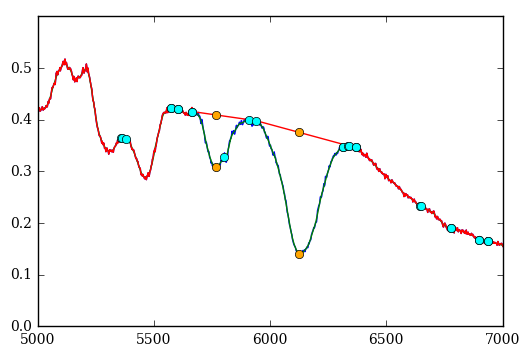

1999ej_combined 1.48 0.431861948049 Check:  0.001 125.250458155 133.026903438
0.197954188758 968177.198798


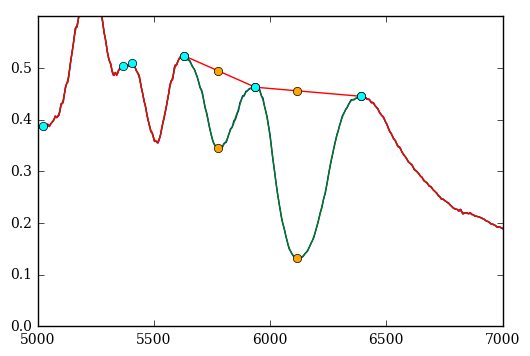

1999gh_combined 1.69 0.465892750777 Check:  0.001 249.748410682 200.322088658
0.402518654952 22524.1143917


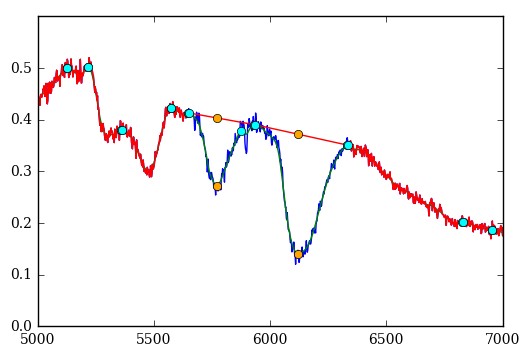

2006gj_combined 1.48 0.566068330603 Check:  0.002 52.1755066096 55.7065557737
0.351436485558 23896.3780749


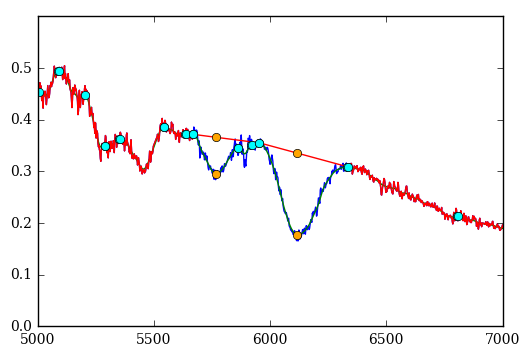

2001fh_combined 1.51 0.448829461113 Check:  0.002 46.7317898874 50.5278263598
0.203701460022 49011.3680178


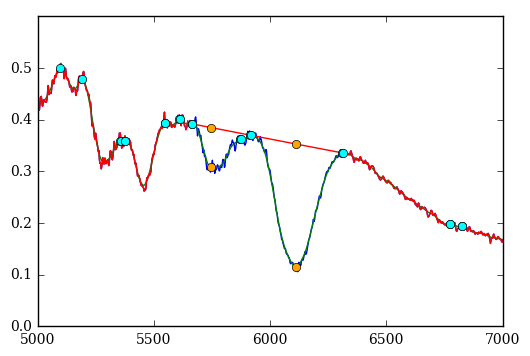

2003u_combined 1.46 0.323404412102 Check:  0.002 57.0314626689 56.0967884424
0.159428508708 407765.314269


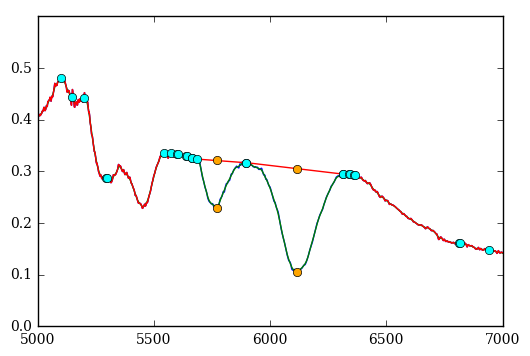

2006kf_combined 1.55 0.455289396904 Check:  0.001 111.477950228 110.466181202
0.374005827118 1361.12449801


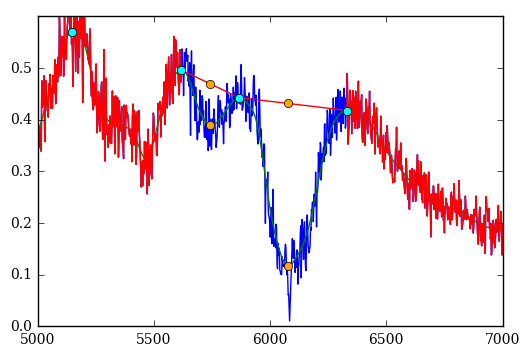

1994t_combined 1.51 0.256366478391 Check:  0.004 10.8795854881 11.2425735047
0.257639083701 26734.0904856


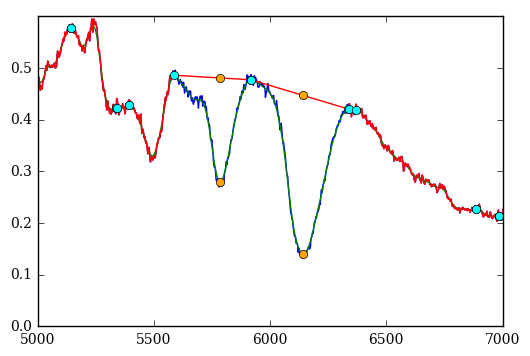

2006gt_combined 1.66 0.655828165375 Check:  0.002 49.606975017 44.5107208666
0.237151978561 650006.567818


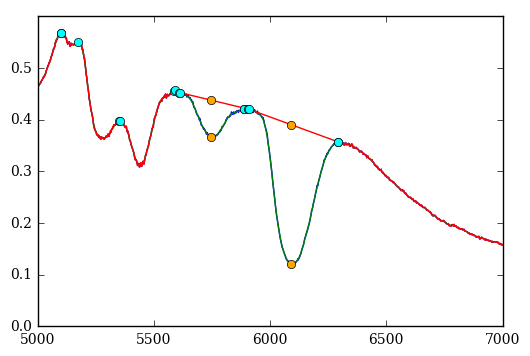

2002he_combined 1.44 0.265149266414 Check:  0.001 221.798316633 219.075133971
0.185071454873 5315439.96294


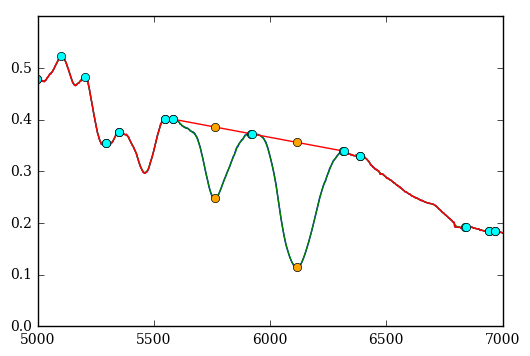

2007on_combined 1.64106422829 0.569533095157 Check:  0.001 550.722095912 422.566975543
0.35339864916 72922.7017522


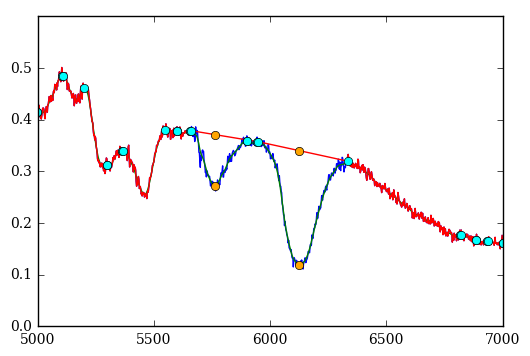

2003iv_combined 1.65 0.452967597571 Check:  0.0015 84.6558628264 90.2907066519
0.177485926441 284179.483541


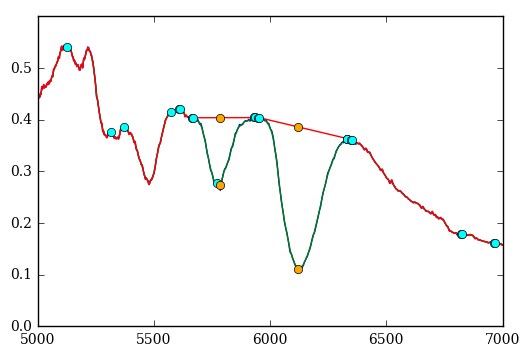

2000dk_combined 1.62 0.474354521916 Check:  0.001 120.547542195 105.030756148
0.416103449492 23472.3462292


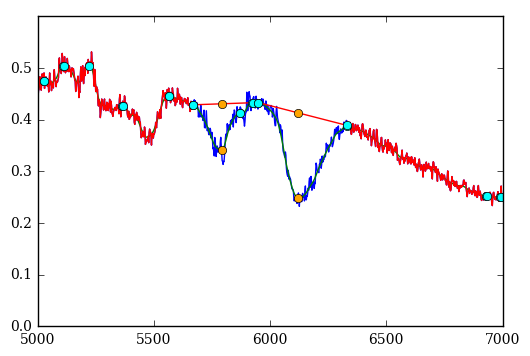

2002do 1.56 0.544504945557 Check:  0.002 54.2158824616 56.9630153063
0.335300878733 5588.31222527


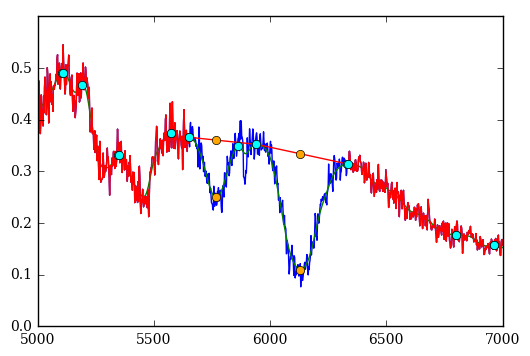

2002hw 1.44 0.491965680392 Check:  0.003 21.1319897423 21.6202650869
0.452027321537 12312.5525227


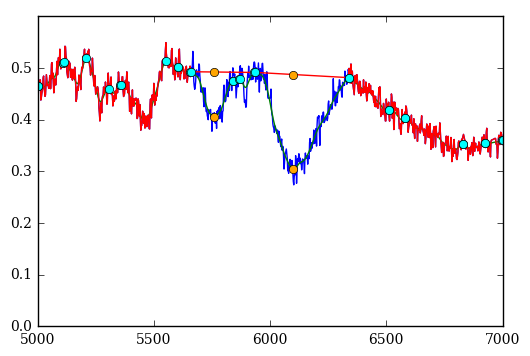

2005mc 1.63 0.473383269083 Check:  0.002 44.9241017449 48.9215632894
0.417069282631 5012.00260486


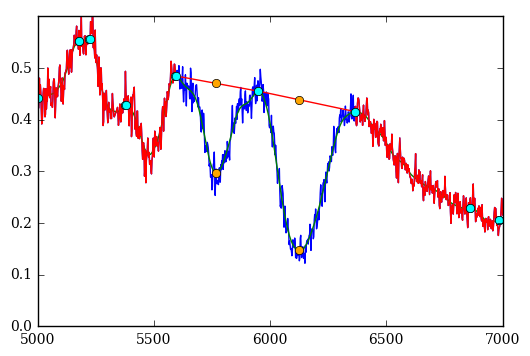

2007au 1.69 0.595156917459 Check:  0.003 27.6145844898 27.759865527
0.285106736071 384857.317408


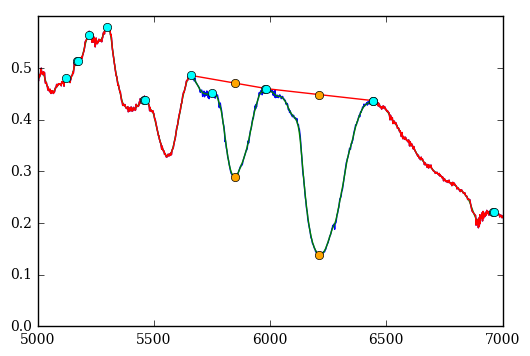

2008r 1.54 0.586142255018 Check:  0.001 176.005065634 167.767706861
5
0.34487984577 85931.230707


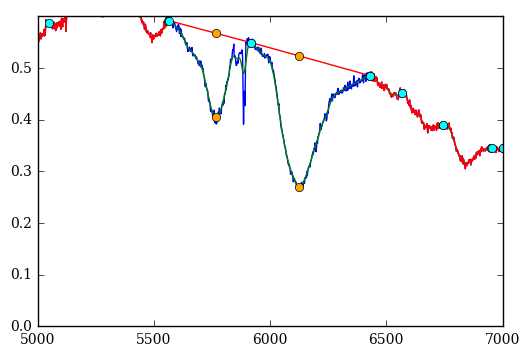

2006mr_combined 1.91637192734 0.640490778469 Check:  0.0015 90.8517145728 99.197519234
0.268615301602 50907.0483629


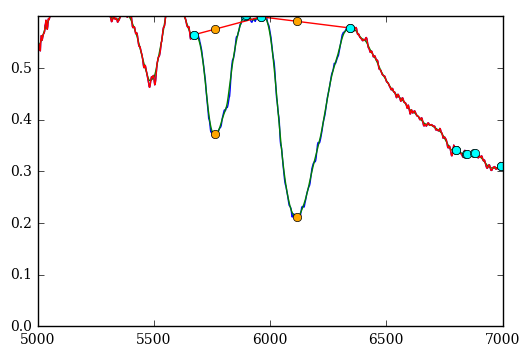

1999da_combined 1.9 0.535526426818 Check:  0.0015 78.1943699319 66.21314957
0.304459441116 11576.6769623


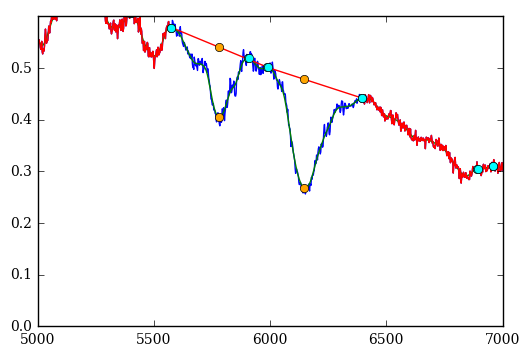

2007ax_combined 1.87 0.646457937931 Check:  0.002 57.389124453 59.1607021071
0.504169127346 12021.7086282


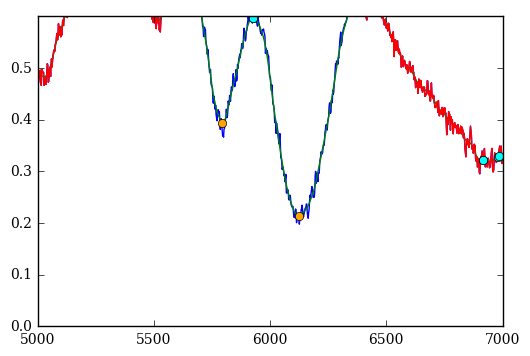

1998de_combined 1.88 0.633544122525 Check:  0.002 50.721640929 53.2282266056
0.332866580642 337090.702996


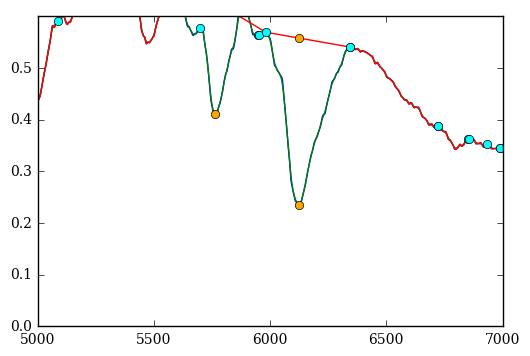

1991bg_combined 1.82682864918 0.674241295788 Check:  0.001 226.664205407 205.418802618
0.346073018506 311162.240881


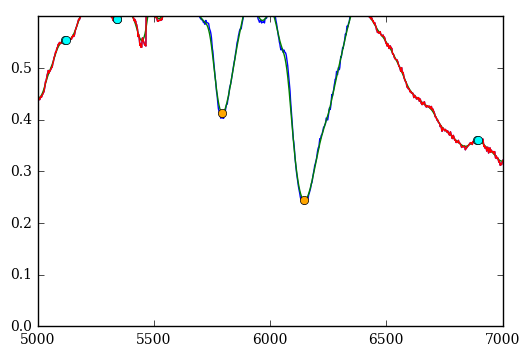

1999by_combined 1.97 0.671278923043 Check:  0.001 215.1123517 226.109130283
0.302618357634 28537.1852211


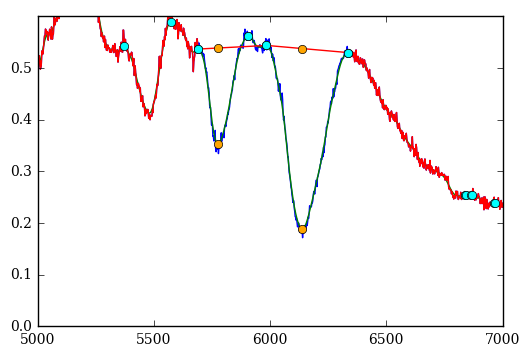

2007ba_combined 1.89 0.533589487439 Check:  0.002 54.3577897949 51.7524973249
0.314609660177 103417.607028


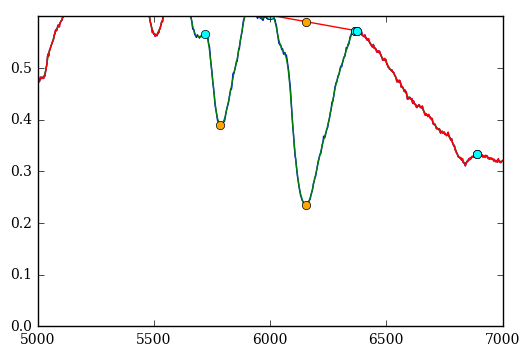

2005ke_combined 1.82 0.729989102365 Check:  0.001 155.543746402 119.931936584
0.472217392014 185485.03125


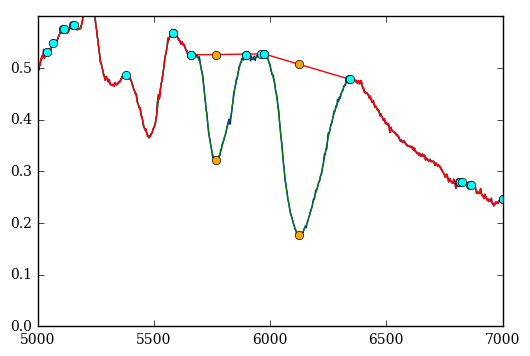

1998bp_combined 1.79 0.619389349906 Check:  0.001 178.209508032 183.88218641
0.466540521755 10742.3577509


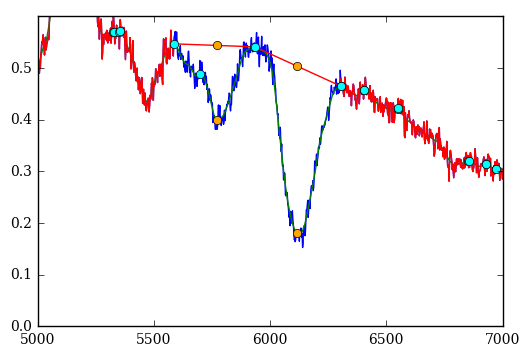

2002fb_combined 1.77 0.444451701894 Check:  0.002 42.3391852227 45.8657897293
0.286534622618 616082.065963


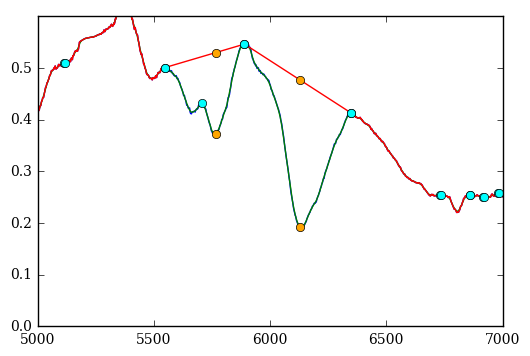

2009f_combined 1.86725515562 0.555317646706 Check:  0.001 252.329431166 235.02148028
0.285175312771 3619.75020145


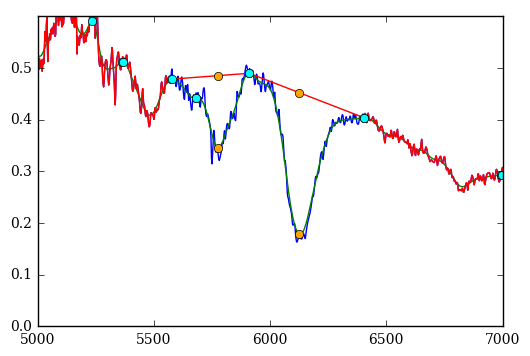

2006cs 1.9352579802 0.511915210609 Check:  0.003 27.7123104295 17.7523768404
0.280812894123 344785.507001


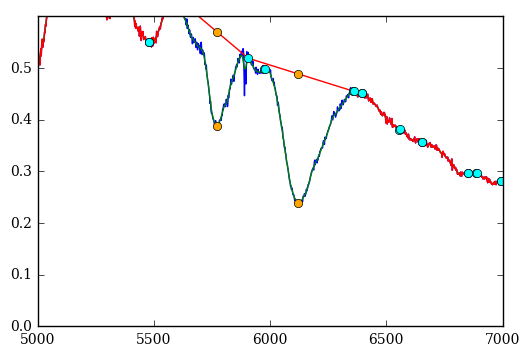

2007n 1.874690474 0.729516486983 Check:  0.001 140.729485511 143.915468826
0.50839661804 5954.54096356


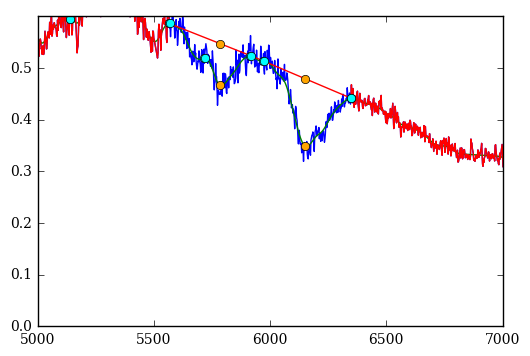

2007al 1.89 0.621399892222 Check:  0.003 37.9877488132 42.3829815175


In [23]:
all_dm15s_med = []
all_ratios_med = []
i=0
bad_measurements = ['sn2004dt-20040816.413-ui-corrected.flm','sn1997bp-19970407.42-mmt.flm','sn2003W-20030207.40-fast.flm',
                    'sn2005A-20050107.25-fast.flm','SN08ia_081210_r01_NTT_EF.dat','SN06mr_061109_r01_CLA_LD.dat',
                    'sn2006bt-20060428.425-ui.flm', 'sn1998es-19981125-ui-corrected.flm','sn1999aa-19990223-ui.flm',
                    'sn1999dq-19990911.46-fast.flm','sn2001V-20010301.47-fast.flm','sn2007S-20070209.30-fast.flm',
                    'SN08fp_080921_b01_DUP_WF.dat','sn2001bf-20010516-ui-corrected.flm','sn2006cz-20060626.304-ui.flm',
                    'sn1999cl-19990612.17-fast.flm','sn2005el-20050928.47-fast.flm']
for sn_arr in sn_arrays_med:
    print i
    dm15_bin = []
    ratio_bin = []
    for SN in sn_arr:
        if SN.dm15_source != None:
            dm15 = SN.dm15_source
        else:
            dm15 = SN.dm15_from_fits
        var = 1./SN.ivar
        if SN.source != 'swift_uv' and SN.filename not in bad_measurements:
            print np.median(SN.flux[SN.x1:SN.x2]), np.median(SN.ivar[SN.x1:SN.x2])
#             vexp, SNR = sa.find_vexp(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            vexp, SNR = sa.autosmooth(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=vexp, dm15 = dm15)
            print SN.name, SN.dm15, r, 'Check: ', vexp, SNR, SN.SNR
            dm15_bin.append(SN.dm15)
            ratio_bin.append(r)
    all_dm15s_med.append(dm15_bin)
    all_ratios_med.append(ratio_bin)
    i+=1

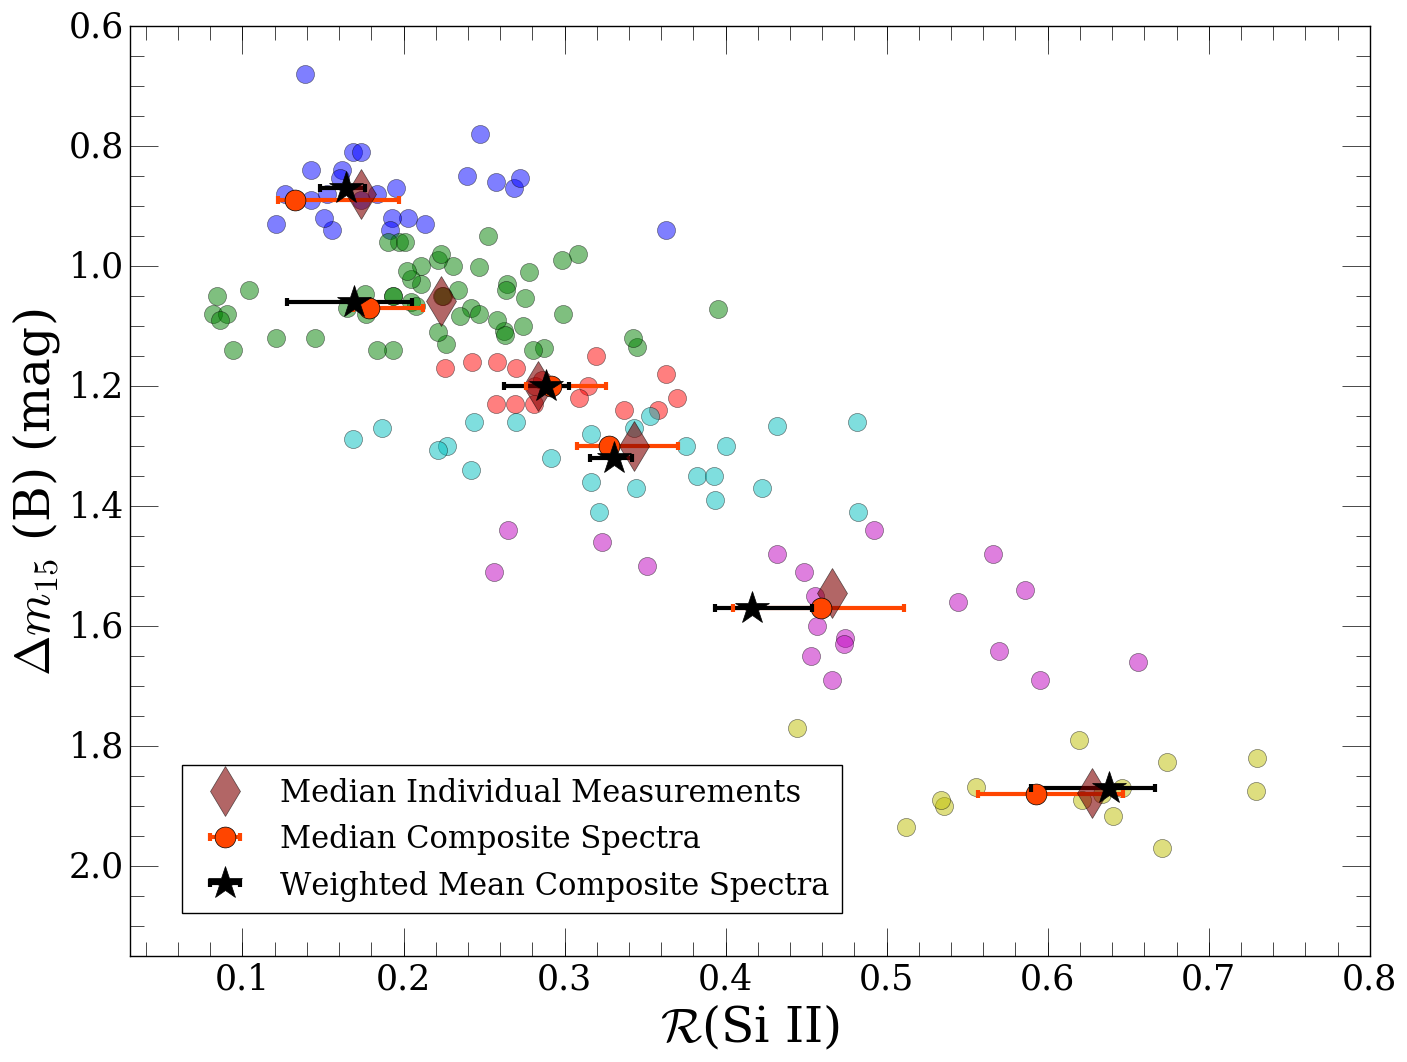

In [24]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 12, forward = True)
plt.minorticks_on()
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('$\mathcal{R}$(Si II)', fontsize = 35)
plt.ylabel('$\Delta m_{15}$ (B) (mag)', fontsize = 35)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
dm15_bin_medians = []
ratio_bin_medians = []
for i in range(len(all_dm15s_med)):
    dm15_bin_medians.append(np.nanmedian(all_dm15s_med[i]))
    ratio_bin_medians.append(np.nanmedian(all_ratios_med[i]))
    plt.plot(np.asarray(all_ratios_med[i]), all_dm15s_med[i], 'o', alpha=.5, markersize=13, zorder=1)
plt.plot(ratio_bin_medians, dm15_bin_medians, 'd', markersize=25, alpha=.6, color = 'maroon', label='Median Individual Measurements')
plt.errorbar(si_ratios_med, dm15s_med, xerr=errors_med, color = 'orangered', fmt='o', markersize=15, elinewidth=3, capthick=3, label='Median Composite Spectra')
plt.errorbar(si_ratios_mean, dm15s_mean, xerr=errors_mean, fmt='k*', markersize=25, elinewidth=3, capthick=3, label='Weighted Mean Composite Spectra')
plt.gca().invert_yaxis()
plt.xlim([0.03,0.8])
plt.ylim([2.15, 0.6])
# plt.legend(loc=3, fontsize = 20, numpoints=1)
plt.legend( loc=3, bbox_to_anchor=(0.03, 0.03, 0.48, 0.5), fontsize=22, numpoints=1)
plt.savefig('../../../Paper_Drafts/main_composites_updated/si_ratio_wmedian.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/si_ratio_median.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
test_dm15s = []
test_ratios = []
for SN in sn_arrays_med[1]:
    if SN.dm15_source != None:
        dm15 = SN.dm15_source
    else:
        dm15 = SN.dm15_from_fits
    var = 1./SN.ivar
#     r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=.002, dm15 = dm15)
    print SN.filename, dm15, SN.phase

In [ ]:
comp1 = comps_dm15_max_fewer_bins_med[0]
comp2 = comps_dm15_max_fewer_bins_mean[0]

In [ ]:
r = sa.measure_si_ratio(comp2.wavelength[comp2.x1:comp2.x2], comp2.flux[comp2.x1:comp2.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_mean:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

In [ ]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()

In [ ]:
r = sa.measure_si_ratio(comp1.wavelength[comp1.x1:comp1.x2], comp1.flux[comp1.x1:comp1.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_med:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

In [ ]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()